In [277]:
import os
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xarray as xr
import dask
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import pandas as pd
import datetime
import copy
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
# %matploblib inline

In [2]:
# iclassdir = '/lustre/or-hydra/cades-arm/proj-shared/iclass/cacti/radar_processing/'
# terrain_file = f'{iclassdir}corgridded_terrain.c0/topo_cacti_csapr2_large.nc'
# stats_file = f'{iclassdir}taranis_corcsapr2cfrppiqcM1_celltracking.c1.test/stats/stats_tracknumbersv1.0_20181015.0000_20190303.0000.nc'
# stats_file3d = f'{iclassdir}taranis_corcsapr2cfrppiqcM1_celltracking.c1.test/stats/stats_3d_ppi_20181015.0000_20190303.0000.nc'

# iclassdir = '/Users/feng045/data/cacti/'
# terrain_file = f'{iclassdir}corgridded_terrain.c0/topo_cacti_csapr2_large.nc'
# stats_file = f'{iclassdir}stats/stats_tracknumbersv1.0_20181015.0000_20190303.0000.nc'
# stats_file3d = f'{iclassdir}stats/stats_3d_ppi_20181015.0000_20190303.0000.nc'
# sat_file = f'{iclassdir}stats/stats_goes16_20181015.0000_20190303.0000.nc'
# sonde_file = f'{iclassdir}stats/interpsonde_celltrack_20181015.0000_20190303.0000.nc'

iclassdir = '/global/project/projectdirs/m1657/zfeng/cacti/arm/csapr/'
statsdir = f'{iclassdir}taranis_corcsapr2cfrppiqcM1_celltracking.c1.new/stats/'
terrain_file = f'{iclassdir}corgridded_terrain.c0/topo_cacti_csapr2_large.nc'
stats_file = f'{statsdir}/stats_tracknumbersv1.0_20181015.0000_20190303.0000.nc'
# stats_file3d = f'{statsdir}/stats/stats_3d_ppi_20181015.0000_20190303.0000.nc'
sat_file = f'{statsdir}/stats_goes16_20181015.0000_20190303.0000.nc'
sonde_file = f'{statsdir}/interpsonde_celltrack_20181015.0000_20190303.0000.nc'

# iclassdir = '/Users/feng045/data/cacti/'
# terrain_file = f'{iclassdir}corgridded_terrain.c0/topo_cacti_csapr2_large.nc'
# statsdir = f'{iclassdir}taranis_corcsapr2cfrppiqcM1_celltracking.c1/stats/'
# # statsdir = f'{iclassdir}taranis_corcsapr2cfrppiqcM1_mpgridded_celltracking.c1/stats/'
# stats_file = f'{statsdir}/stats_tracknumbersv1.0_20181015.0000_20190303.0000.nc'
# # stats_file3d = f'{statsdir}/stats_3d_ppi_20181015.0000_20190303.0000.nc'
# sat_file = f'{statsdir}/stats_goes16_dilated_20181015.0000_20190303.0000.nc'
# # sat_file = f'{statsdir}/stats_goes16_undilated_20181015.0000_20190303.0000.nc'
# sonde_file = f'{statsdir}/interpsonde_celltrack_20181015.0000_20190303.0000.nc'

radar_lat = -32.1264
radar_lon = -64.7284

# figdir = f'{iclassdir}taranis_corcsapr2cfrppiqcM1_celltracking.c1/figures/'
# figdir = f'{iclassdir}taranis_corcsapr2cfrppiqcM1_celltracking.c1.test/figures/'
figdir = f'{iclassdir}taranis_corcsapr2cfrppiqcM1_celltracking.c1.new/figures/celltrack_environment_stats/'
# figdir = f'/Users/feng045/results/ICLASS/CACTI/CSAPR/figures/stats/celltrack_environment_stats/'
# figdir = f'/Users/feng045/results/ICLASS/CACTI/CSAPR/figures/stats_mpgrid/celltrack_environment_stats/'
figdir_jointhist = f'{figdir}jointhist/'
os.makedirs(figdir, exist_ok=True)
os.makedirs(figdir_jointhist, exist_ok=True)

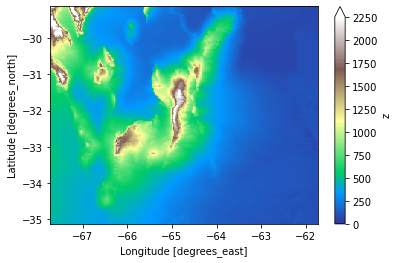

In [3]:
terr = xr.open_dataset(terrain_file)
topoZ = terr['z']
topoLon = terr['x']
topoLat = terr['y']
# topoZ = terr.hgt
# topoLon = terr.longitude
# topoLat = terr.latitude

topoZ.plot(vmin=0, vmax=2250, cmap='terrain')

In [4]:
# Read sonde data
sonde = xr.open_dataset(sonde_file)
sonde.dims['tracks']

6895

In [5]:
# Read 2D track data
stats2d = xr.open_dataset(stats_file)
time_res = stats2d.attrs['time_resolution_hour']
pixel_radius = stats2d.attrs['pixel_radius_km']
stats2d.dims['tracks']

6895

In [6]:
# # Read 3D data
# stats3d = xr.open_dataset(stats_file3d)
# stats3d.dims['tracks']

In [7]:
# Read satellite data
sat = xr.open_dataset(sat_file, drop_variables=['basetime', 'cell_area'])
sat.dims['tracks']

6895

In [8]:
# Combine datasets by coordinates
# stats = xr.combine_by_coords([stats2d, stats3d, sat, sonde], combine_attrs='override')
stats = xr.combine_by_coords([stats2d, sat, sonde], combine_attrs='override')
stats.load()
print(stats)

<xarray.Dataset>
Dimensions:                    (reltime: 4, times: 60, tracks: 6895)
Coordinates:
  * tracks                     (tracks) int32 0 1 2 3 4 ... 6891 6892 6893 6894
  * times                      (times) int32 0 1 2 3 4 5 6 ... 54 55 56 57 58 59
  * reltime                    (reltime) int32 0 -1 -2 -3
Data variables: (12/103)
    cloud_top_temperature_min  (tracks, times) float32 nan nan nan ... nan nan
    temperature_ir_min         (tracks, times) float32 301.0 302.3 ... nan nan
    cloud_top_height_max       (tracks, times) float32 0.0 0.0 nan ... nan nan
    cloud_top_pressure_min     (tracks, times) float32 nan nan nan ... nan nan
    area_liquid                (tracks, times) float32 0.0 0.0 nan ... nan nan
    area_ice                   (tracks, times) float32 0.0 0.0 nan ... nan nan
    ...                         ...
    u500p                      (tracks, reltime) float32 12.82 12.89 ... 12.25
    v500p                      (tracks, reltime) float32 -6.238 -6.1

In [9]:
tracks = stats['tracks']
times = stats['times']
# height = stats['z'] / 1000.
# time_res = stats.attrs['time_resolution_hour']
# pixel_radius = stats.attrs['pixel_radius_km']
print(f'Number of total tracks: {len(tracks)}')

# Get cell initial location
cell_lon0 = stats['cell_meanlon'].isel(times=0)
# Remove NaN
ind = np.where(~np.isnan(cell_lon0))[0]
ntracks = len(ind)
print(f'Number of valid tracks: {ntracks}')

# Subset tracks for the entire dataset
stats = stats.isel(tracks=ind)
stats.dims['tracks']

Number of total tracks: 6895
Number of valid tracks: 6887


6887

In [10]:
lifetime = stats['lifetime'] * time_res
start_time = stats['start_basetime']
end_time = stats['end_basetime']
end_merge_tracknumber = stats['end_merge_tracknumber']
start_split_tracknumber = stats['start_split_tracknumber']
cell_lon = stats['cell_meanlon']
cell_lat = stats['cell_meanlat']
cell_area = stats['cell_area']
maxrange_flag = stats['maxrange_flag']

eth10 = stats['maxETH_10dbz']
eth20 = stats['maxETH_20dbz']
eth30 = stats['maxETH_30dbz']
eth40 = stats['maxETH_40dbz']
eth50 = stats['maxETH_50dbz']

In [11]:
# cape = stats.cape.sel(reltime=0)
# cape = cape.where(cape > 0)
# cape.plot.hist(bins=50)

In [12]:
# Get track start values
start_maxrange_flag = maxrange_flag.isel(times=0)
start_lon = cell_lon.isel(times=0)
start_lat = cell_lat.isel(times=0)

# Get duration (lifetime counts) and maxrange_flag in Numpy arrays for speed
duration = (lifetime.values / time_res).astype(int)
rangeflag = maxrange_flag.values.astype(int)
celllon = cell_lon.values
celllat = cell_lat.values

end_maxrange_flag = np.ones(ntracks, dtype=int)
end_lon = np.full(ntracks, np.NaN, dtype=float)
end_lat = np.full(ntracks, np.NaN, dtype=float)

# Get track last valid value
for ii in range(0, ntracks):
    # Get duration for the track
    iduration = duration[ii]
    # Get valid values for the track
    imaxrangeflag = rangeflag[ii,0:iduration]
    icell_lon = celllon[ii,0:iduration]
    icell_lat = celllat[ii,0:iduration]
    
    # Get last value from the track
    end_maxrange_flag[ii] = imaxrangeflag[-1]
    end_lon[ii] = icell_lon[-1]
    end_lat[ii] = icell_lat[-1]

In [13]:
# Get track start/end hour
start_hour = start_time.dt.hour
end_hour = end_time.dt.hour

# Find tracks not end with merge or not start with split
nonmerge = np.where(np.isnan(end_merge_tracknumber))[0]
nonsplit = np.where(np.isnan(start_split_tracknumber))[0]
ntracks_nonmerge = len(nonmerge)
ntracks_nonsplit = len(nonsplit)
print(f'Number of non-merge tracks: {ntracks_nonmerge}')
print(f'Number of non-split tracks: {ntracks_nonsplit}')

nonsplit_in = np.where(np.isnan(start_split_tracknumber) & (start_maxrange_flag == 1))[0]
nonmerge_in = np.where(np.isnan(end_merge_tracknumber) & (end_maxrange_flag == 1))[0]
ntracks_nonsplit_in = len(nonsplit_in)
ntracks_nonmerge_in = len(nonmerge_in)
print(f'Number of non-split tracks within max range: {ntracks_nonsplit_in}')
print(f'Number of non-merge tracks within max range: {ntracks_nonmerge_in}')

merge = np.where(end_merge_tracknumber > 0)[0]
split = np.where(start_split_tracknumber > 0)[0]
ntracks_merge = len(merge)
ntracks_split = len(split)
print(f'Number of merge tracks: {ntracks_merge}')
print(f'Number of split tracks: {ntracks_split}')

Number of non-merge tracks: 5284
Number of non-split tracks: 5359
Number of non-split tracks within max range: 4854
Number of non-merge tracks within max range: 4528
Number of merge tracks: 1603
Number of split tracks: 1528


In [117]:
cell_diam = 2 * np.sqrt(cell_area / np.pi)
cell_diam_max = cell_diam.max(dim='times')
cell_area_max = cell_area.max(dim='times')
cell_eth20_max = eth20.max(dim='times')

In [15]:
sonde.keys()

KeysView(<xarray.Dataset>
Dimensions:    (reltime: 4, tracks: 6895)
Coordinates:
  * tracks     (tracks) int32 0 1 2 3 4 5 6 ... 6889 6890 6891 6892 6893 6894
  * reltime    (reltime) int32 0 -1 -2 -3
Data variables: (12/47)
    time       (tracks, reltime) datetime64[ns] ...
    height     (tracks, reltime) float32 ...
    cape       (tracks, reltime) float32 ...
    cin        (tracks, reltime) float32 ...
    lcl_p      (tracks, reltime) float32 ...
    lcl_t      (tracks, reltime) float32 ...
    ...         ...
    u500p      (tracks, reltime) float32 ...
    v500p      (tracks, reltime) float32 ...
    q500p      (tracks, reltime) float32 ...
    rh500p     (tracks, reltime) float32 ...
    u300p      (tracks, reltime) float32 ...
    v300p      (tracks, reltime) float32 ...
Attributes:
    title:              InterpSonde parameters matched to tracked cells
    Institution:        Pacific Northwest National Laboratoy
    Contact:            Zhe Feng, zhe.feng@pnnl.gov
    Created

In [16]:
# Choose 0 hour relative time, and filter negative parcel values
cape = stats.cape.where(stats.cape > 0).sel(reltime=0)
cin = stats.cin.where(stats.cin >= 0).sel(reltime=0)
lcl_z = stats.lcl_z.where(stats.lcl_z >= 0).sel(reltime=0)
lfc_z = stats.lfc_z.where(stats.lfc_z >= 0).sel(reltime=0)
lnb_z = stats.lnb_z.where(stats.lnb_z >= 0).sel(reltime=0)
lpl_z = stats.height.where(stats.height >= 0).sel(reltime=0)
q850p = stats.q850p.sel(reltime=0)*1000
q700p = stats.q700p.sel(reltime=0)*1000
rh700p = stats.rh700p.sel(reltime=0)
rh500p = stats.rh500p.sel(reltime=0)
shear6mag = stats.shear6mag.sel(reltime=0)
shear3mag = stats.shear3mag.sel(reltime=0)
u700p = stats.u700p.sel(reltime=0)
v700p = stats.v700p.sel(reltime=0)
u850p = stats.u850p.sel(reltime=0)
v850p = stats.v850p.sel(reltime=0)

In [307]:
# date_ts = pd.date_range(start='2018-10-15T00', end='2019-03-02T23', freq='6H')
# date_ts_bounds = pd.date_range(start='2018-10-15T00', end='2019-03-03T00', freq='6H')
# ndate_ts = len(date_ts)
# print(date_ts)

DatetimeIndex(['2018-10-15 00:00:00', '2018-10-15 06:00:00',
               '2018-10-15 12:00:00', '2018-10-15 18:00:00',
               '2018-10-16 00:00:00', '2018-10-16 06:00:00',
               '2018-10-16 12:00:00', '2018-10-16 18:00:00',
               '2018-10-17 00:00:00', '2018-10-17 06:00:00',
               ...
               '2019-02-28 12:00:00', '2019-02-28 18:00:00',
               '2019-03-01 00:00:00', '2019-03-01 06:00:00',
               '2019-03-01 12:00:00', '2019-03-01 18:00:00',
               '2019-03-02 00:00:00', '2019-03-02 06:00:00',
               '2019-03-02 12:00:00', '2019-03-02 18:00:00'],
              dtype='datetime64[ns]', length=556, freq='6H')


In [220]:
# print(date_ts[28])
# len(np.where((start_time >= date_ts[28]) & (start_time < date_ts[29]))[0])

In [221]:
# # Approximate longitude of SDC ridge
# lon_SDC = -64.9
# lon_eSDC = [-64.9, -63.]
# idx_eSDC = np.where(start_lon > lon_SDC)[0]
# idx_wSDC = np.where(start_lon <= lon_SDC)[0]
# ntracks_e = len(idx_eSDC)
# ntracks_w = len(idx_wSDC)
# print(f'E.SDC: {ntracks_e}, W.SDC: {ntracks_w}')

# start_time_e = start_time.isel(tracks=idx_eSDC)
# start_time_w = start_time.isel(tracks=idx_wSDC)

E.SDC: 4283, W.SDC: 2604


In [328]:
# bins_diam = np.arange(4, 25.1, 1)
# bins_eth = np.arange(1, 20.1, 1)
# nbins_diam = len(bins_diam)
# nbins_eth = len(bins_eth)
# pdf_celldiam, bins = np.histogram(cell_diam_max, bins=bins_diam, density=True)
# pdf_eth20, bins = np.histogram(cell_eth20_max, bins=bins_eth, density=True)

In [330]:
# plt.plot(bins_diam[:-1], pdf_celldiam)

In [331]:
# plt.plot(bins_eth[:-1], pdf_eth20)

In [332]:
# ntracks_ts = np.full(ndate_ts, np.nan, dtype=float)
# ntracks_e_ts = np.full(ndate_ts, np.nan, dtype=float)
# ntracks_w_ts = np.full(ndate_ts, np.nan, dtype=float)
# cellarea_avg_ts = np.full(ndate_ts, 0, dtype=float)
# celldiam_avg_ts = np.full(ndate_ts, 0, dtype=float)
# celldiam_pdf_ts = np.full((nbins_diam-1, ndate_ts), 0, dtype=float)
# celleth20_pdf_ts = np.full((nbins_eth-1, ndate_ts), 0, dtype=float)

# for ii in range(ndate_ts-1):
# #     print(date_ts[ii])
#     idx = np.where((start_time.values >= date_ts[ii]) & (start_time.values < date_ts[ii+1]))[0]
#     idx_e = np.where((start_time_e.values >= date_ts[ii]) & (start_time_e.values < date_ts[ii+1]))[0]
#     idx_w = np.where((start_time_w.values >= date_ts[ii]) & (start_time_w.values < date_ts[ii+1]))[0]
#     count = len(idx)
#     count_e = len(idx_e)
#     count_w = len(idx_w)
#     ntracks_ts[ii] = count
#     ntracks_e_ts[ii] = count_e
#     ntracks_w_ts[ii] = count_w
# #     if count > 0:
#     icellarea = cell_area_max.isel(tracks=idx)
#     icelldiam = cell_diam_max.isel(tracks=idx)
#     ieth20 = cell_eth20_max.isel(tracks=idx)
#     cellarea_avg_ts[ii] = np.nanmean(icellarea)
#     celldiam_avg_ts[ii] = np.nanmean(icelldiam)
#     ipdf, bins = np.histogram(icelldiam, bins=bins_diam, density=False)
#     celldiam_pdf_ts[:,ii] = ipdf
#     ipdf, bins = np.histogram(ieth20, bins=bins_eth, density=False)
#     celleth20_pdf_ts[:,ii] = ipdf

<ipython-input-332-1ff1cac0d27b>:24: RuntimeWarning: Mean of empty slice
  cellarea_avg_ts[ii] = np.nanmean(icellarea)
<ipython-input-332-1ff1cac0d27b>:25: RuntimeWarning: Mean of empty slice
  celldiam_avg_ts[ii] = np.nanmean(icelldiam)


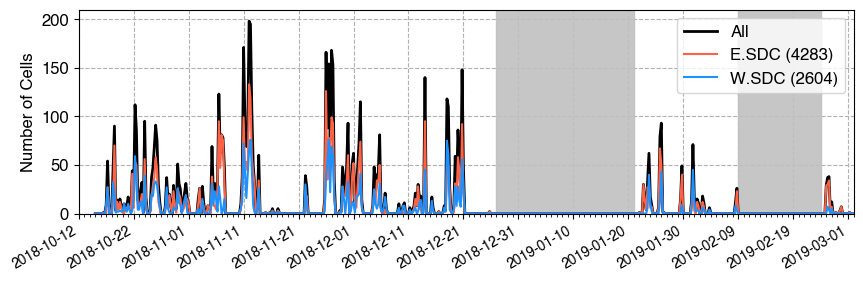

In [333]:
# mpl.rcParams['font.size'] = 12
# mpl.rcParams['font.family'] = 'Helvetica'
# fig, ax = plt.subplots(1, 1, figsize=[10,3], dpi=100)

# outtimes1 = [pd.Timestamp('2018-12-27T00'),  pd.Timestamp('2019-2-9T00')]
# outtimes2 = [pd.Timestamp('2019-1-21T00'),  pd.Timestamp('2019-2-24T00')]
# xlims = [pd.Timestamp('2018-10-12T00'), pd.Timestamp('2019-3-2T00')]

# ax.plot(date_ts, ntracks_ts, color='k', lw=2, label=f'All')
# ax.plot(date_ts, ntracks_e_ts, color='tomato', lw=1.5, label=f'E.SDC ({ntracks_e})')
# ax.plot(date_ts, ntracks_w_ts, color='dodgerblue', lw=1.5, label=f'W.SDC ({ntracks_w})')
# # time_fmt = mdates.DateFormatter('%b %d')
# time_fmt = mdates.DateFormatter('%Y-%m-%d')
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
# ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
# ax.xaxis.set_major_formatter(time_fmt)
# ax.tick_params(axis='x', labelsize=10)
# ax.set_ylabel('Number of Cells')
# ax.set_xlim(xlims[0], xlims[1])
# ax.set_ylim(0,210)
# ax.grid(which='major', ls='--')
# ax.legend()
# # Plot outtage times
# for ii in range(len(outtimes1)):
#     ax.axvspan(outtimes1[ii], outtimes2[ii], color='silver',alpha=0.9,zorder=2)

# fig.autofmt_xdate()
# fig.savefig(f'{figdir}cellnumber_timeseries_fullcampaign.png', bbox_inches='tight', dpi=300)

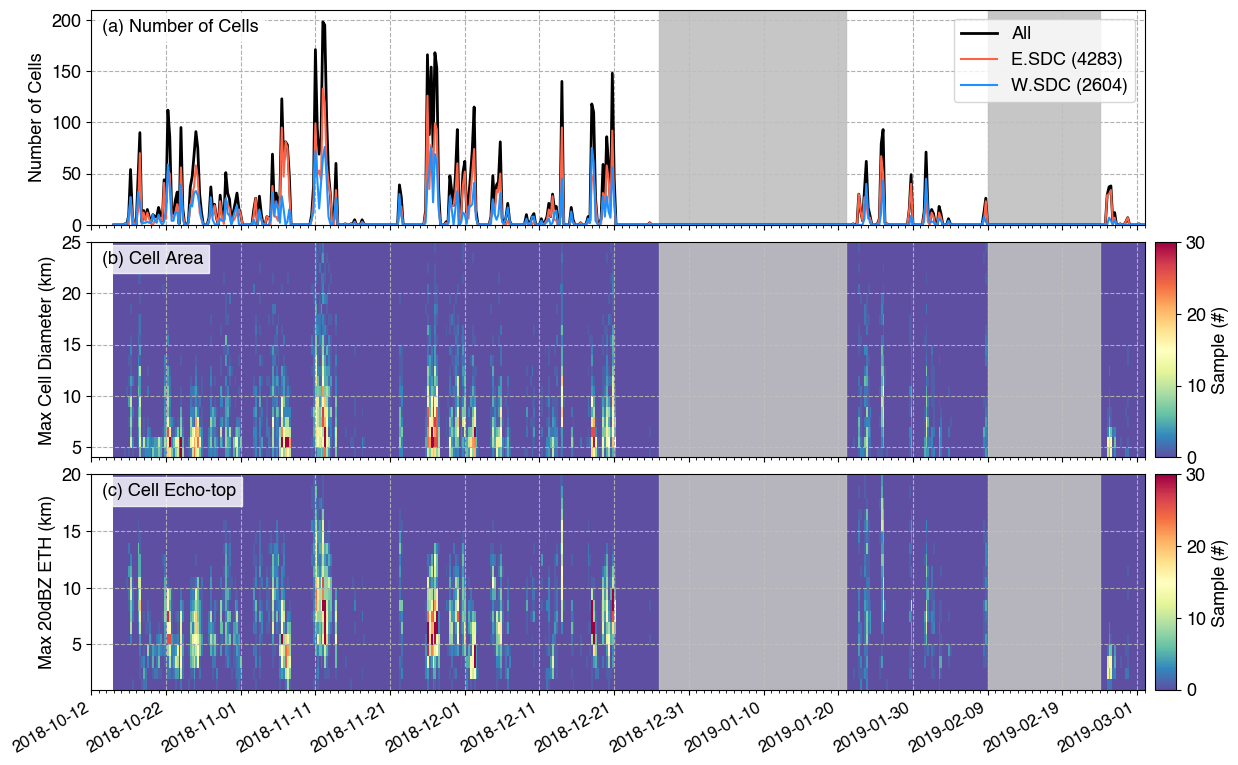

In [339]:
# mpl.rcParams['font.size'] = 13
# mpl.rcParams['font.family'] = 'Helvetica'
# fig = plt.figure(figsize=[14,10], dpi=100)
# gs = gridspec.GridSpec(3,2, height_ratios=[1,1,1], width_ratios=[1,0.02])
# gs.update(wspace=0.02, hspace=0.08)

# outtimes1 = [pd.Timestamp('2018-12-27T00'),  pd.Timestamp('2019-2-9T00')]
# outtimes2 = [pd.Timestamp('2019-1-21T00'),  pd.Timestamp('2019-2-24T00')]
# xlims = [pd.Timestamp('2018-10-12T00'), pd.Timestamp('2019-3-2T00')]

# # ax = axes[0]
# ax = plt.subplot(gs[0,0])
# l1 = ax.plot(date_ts, ntracks_ts, color='k', lw=2, label=f'All')
# l2 = ax.plot(date_ts, ntracks_e_ts, color='tomato', lw=1.5, label=f'E.SDC ({ntracks_e})')
# l3 = ax.plot(date_ts, ntracks_w_ts, color='dodgerblue', lw=1.5, label=f'W.SDC ({ntracks_w})')
# time_fmt = mdates.DateFormatter('%Y-%m-%d')
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
# ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
# # ax.xaxis.set_major_formatter(time_fmt)
# ax.tick_params(axis='x', labelsize=12)
# ax.set_ylabel('Number of Cells')
# ax.set_xlim(xlims[0], xlims[1])
# ax.set_ylim(0,210)
# ax.grid(which='major', ls='--')
# ax.legend(loc='upper right')
# t1 = ax.text(0.01, 0.9, '(a) Number of Cells', transform=ax.transAxes)
# t1.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='w'))
# # Plot outtage times
# for ii in range(len(outtimes1)):
#     ax.axvspan(outtimes1[ii], outtimes2[ii], color='silver',alpha=0.9,zorder=2)
    
# ax = plt.subplot(gs[1,0])
# pm1 = ax.pcolormesh(date_ts_bounds, bins_diam, celldiam_pdf_ts, shading='flat', vmax=30, cmap='Spectral_r')
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
# ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
# ax.tick_params(axis='x', labelsize=12)
# ax.set_ylabel('Max Cell Diameter (km)')
# ax.set_xlim(xlims[0], xlims[1])
# ax.set_ylim(4,25)
# ax.grid(which='major', ls='--')
# t2 = ax.text(0.01, 0.9, '(b) Cell Area', transform=ax.transAxes)
# t2.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='w'))
# cax = plt.subplot(gs[1,1])
# cb1 = mpl.colorbar.Colorbar(ax=cax, mappable=pm1, label='Sample (#)')
# # Plot outtage times
# for ii in range(len(outtimes1)):
#     ax.axvspan(outtimes1[ii], outtimes2[ii], color='silver',alpha=0.9,zorder=2)

# ax = plt.subplot(gs[2,0])
# pm2 = ax.pcolormesh(date_ts_bounds, bins_eth, celleth20_pdf_ts, shading='flat', vmax=30, cmap='Spectral_r')
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
# ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
# ax.xaxis.set_major_formatter(time_fmt)
# ax.tick_params(axis='x', labelsize=12)
# ax.set_ylabel('Max 20dBZ ETH (km)')
# ax.set_xlim(xlims[0], xlims[1])
# ax.set_ylim(1,20)
# ax.grid(which='major', ls='--')
# t2 = ax.text(0.01, 0.9, '(c) Cell Echo-top', transform=ax.transAxes)
# t2.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='w'))
# cax = plt.subplot(gs[2,1])
# cb2 = mpl.colorbar.Colorbar(ax=cax, mappable=pm2, label='Sample (#)')
# # Plot outtage times
# for ii in range(len(outtimes1)):
#     ax.axvspan(outtimes1[ii], outtimes2[ii], color='silver',alpha=0.9,zorder=2)
    
# fig.autofmt_xdate()
# fig.savefig(f'{figdir}cellnumber_diameter_ETH20dBZ_timeseries_fullcampaign.png', bbox_inches='tight', dpi=300)

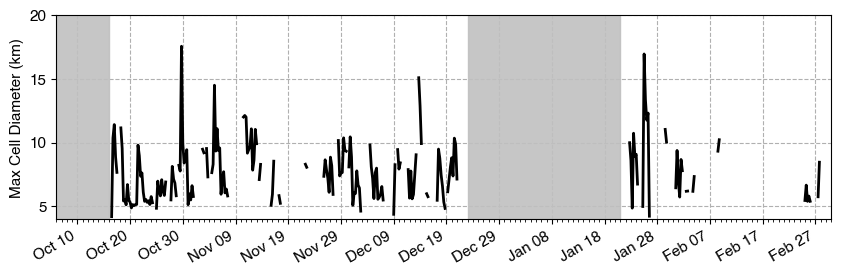

In [195]:
# fig, ax = plt.subplots(1, 1, figsize=[10,3], dpi=100)

# ax.plot(date_ts, celldiam_avg_ts, color='k', lw=2)
# ax.set_xlim(xlims[0], xlims[1])
# ax.set_ylim(4,20)
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
# ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
# ax.xaxis.set_major_formatter(time_fmt)
# ax.set_ylabel('Max Cell Diameter (km)')
# ax.grid(which='major', ls='--')

# ax.axvspan(xlims[0],xblock1,color='silver',alpha=0.9,zorder=2)
# ax.axvspan(xblock2,xblock3,color='silver',alpha=0.9,zorder=2)

# fig.autofmt_xdate()

In [17]:
# Get max value over lifetime
max_eth30 = eth30.max(dim='times')
max_dbz = stats.maxdbz.max(dim='times')

eth_bins = np.arange(0,21,1)
dbz_bins = np.arange(10,75.1,5)
quantiles_2Dvar = [0.25,0.5,0.75]

max_dbz_ns, bins = np.histogram(max_dbz, bins=dbz_bins, density=False)
max_eth30_ns, bins = np.histogram(max_eth30, bins=eth_bins, density=False)

nquantiles = len(quantiles_2Dvar)
maxETH30_cape_pts = np.full((len(eth_bins)-1, nquantiles), np.nan, dtype=float)
maxdbz_cape_pts = np.full((len(dbz_bins)-1, nquantiles), np.nan, dtype=float)

maxETH30_cape_avg = np.full(len(eth_bins)-1, np.nan, dtype=float)
maxdbz_cape_avg = np.full(len(dbz_bins)-1, np.nan, dtype=float)
for ibin in range(len(eth_bins)-1):
    maxETH30_cape_pts[ibin,:] = cape.where((max_eth30 >= eth_bins[ibin]) & (max_eth30 < eth_bins[ibin+1]), drop=True).quantile(quantiles_2Dvar, skipna=True)
    maxETH30_cape_avg[ibin] = cape.where((max_eth30 >= eth_bins[ibin]) & (max_eth30 < eth_bins[ibin+1]), drop=True).mean()

for ibin in range(len(dbz_bins)-1):
    maxdbz_cape_pts[ibin,:] = cape.where((max_dbz >= dbz_bins[ibin]) & (max_dbz < dbz_bins[ibin+1]), drop=True).quantile(quantiles_2Dvar, skipna=True)
    maxdbz_cape_avg[ibin] = cape.where((max_dbz >= dbz_bins[ibin]) & (max_dbz < dbz_bins[ibin+1]), drop=True).mean()
    
# plt.plot(eth_bins[:-1], cape_eth30)

In [18]:
cape_bins = np.arange(0,4001,200)

cape_ns, bins = np.histogram(cape, bins=cape_bins, density=False)

cape_maxETH30_pts = np.full((len(cape_bins)-1, nquantiles), np.nan, dtype=float)

cape_maxETH30_avg = np.full(len(cape_bins)-1, np.nan, dtype=float)
for ibin in range(len(cape_bins)-1):
    cape_maxETH30_pts[ibin,:] = max_eth30.where((cape >= cape_bins[ibin]) & (cape < cape_bins[ibin+1]), drop=True).quantile(quantiles_2Dvar, skipna=True)
    cape_maxETH30_avg[ibin] = max_eth30.where((cape >= cape_bins[ibin]) & (cape < cape_bins[ibin+1]), drop=True).mean()

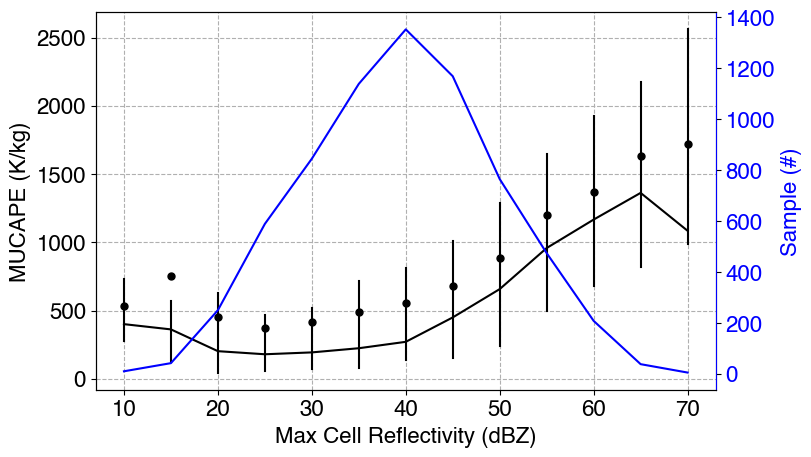

In [19]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = 'Helvetica'
fig, axes = plt.subplots(1, 1, figsize=(8, 5), dpi=100)

ax1 = axes
ax1.plot(dbz_bins[:-1], maxdbz_cape_pts[:,1], color='k')
for ibin in range(len(dbz_bins)-1):
    ax1.plot((dbz_bins[ibin],dbz_bins[ibin]), maxdbz_cape_pts[ibin,(0,2)], color='k')
ax1.plot(dbz_bins[:-1], maxdbz_cape_avg, 'o', color='k', markersize=5)
ax1.set_xlabel('Max Cell Reflectivity (dBZ)')
ax1.set_ylabel('MUCAPE (K/kg)')
ax1.grid(ls='--')

ax2 = ax1.twinx()
ax2.plot(dbz_bins[:-1], max_dbz_ns, color='b')
ax2.set_ylabel('Sample (#)', color='b')
# ax2.set_ylim(4, 18)
ax2.tick_params(axis='y', labelcolor='b')
ax2.spines['right'].set_color('b')

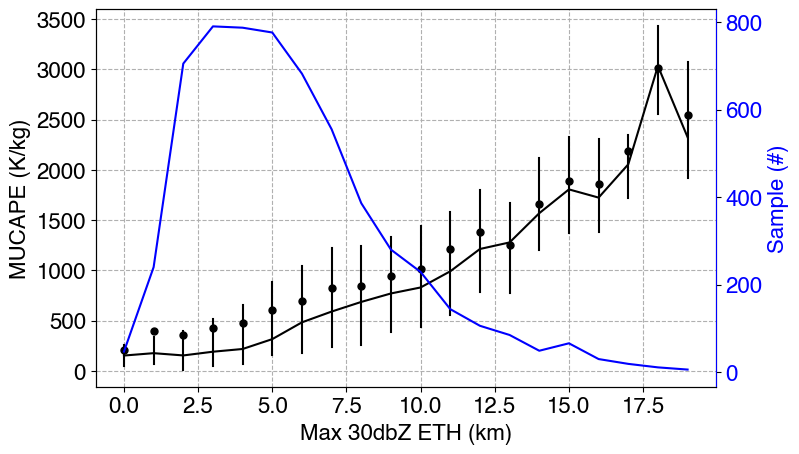

In [20]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = 'Helvetica'
fig, axes = plt.subplots(1, 1, figsize=(8, 5), dpi=100)

ax1 = axes
# ax1.errorbar(eth_bins[:-1], maxETH30_cape_pts[:,1], yerr=maxETH30_cape_pts[:,(0,2)].transpose(), color='k')
ax1.plot(eth_bins[:-1], maxETH30_cape_pts[:,1], color='k')
for ibin in range(len(eth_bins)-1):
    ax1.plot((eth_bins[ibin],eth_bins[ibin]), maxETH30_cape_pts[ibin,(0,2)], color='k')
ax1.plot(eth_bins[:-1], maxETH30_cape_avg, 'o', color='k', markersize=5)
ax1.set_xlabel('Max 30dbZ ETH (km)')
ax1.set_ylabel('MUCAPE (K/kg)')
ax1.grid(ls='--')

ax2 = ax1.twinx()
ax2.plot(eth_bins[:-1], max_eth30_ns, color='b')
ax2.set_ylabel('Sample (#)', color='b')
# ax2.set_ylim(4, 18)
ax2.tick_params(axis='y', labelcolor='b')
ax2.spines['right'].set_color('b')

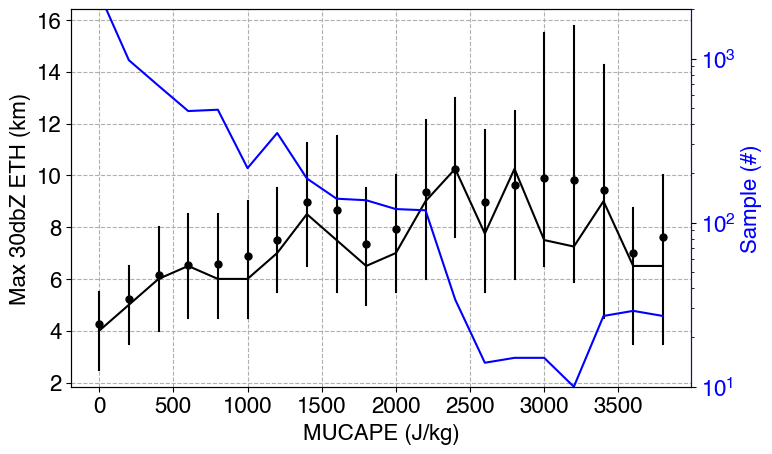

In [21]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = 'Helvetica'
fig, axes = plt.subplots(1, 1, figsize=(8, 5), dpi=100)

ax1 = axes
ax1.plot(cape_bins[:-1], cape_maxETH30_pts[:,1], color='k')
for ibin in range(len(cape_bins)-1):
    ax1.plot((cape_bins[ibin],cape_bins[ibin]), cape_maxETH30_pts[ibin,(0,2)], color='k')
ax1.plot(cape_bins[:-1], cape_maxETH30_avg, 'o', color='k', markersize=5)
ax1.set_xlabel('MUCAPE (J/kg)')
ax1.set_ylabel('Max 30dbZ ETH (km)')
ax1.grid(ls='--')

ax2 = ax1.twinx()
ax2.plot(cape_bins[:-1], cape_ns, color='b')
ax2.set_ylabel('Sample (#)', color='b')
ax2.set_ylim(10, 2000)
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='b')
ax2.spines['right'].set_color('b')

In [22]:
# Find tracks initiation east of SDC during the day (12PM - 8PM)
# LT = UTC + 3
# Approximate longitude of SDC ridge
lon_SDC = -64.9
lon_eSDC = [-64.9, -63.]
# Day/night hour range in UTC
UTChour_day = [15,22]
UTChour_night = [0,8]

# cape_range1 = [50,500]
# cape_range2 = [500,1500]
# cape_range3 = [1500,4000]
cape_range1 = [50,400]
cape_range2 = [400,900]
cape_range3 = [900,4000]

cell_area1_cape = stats.cell_area.where((start_lon >= lon_SDC) & 
                                        (cape > cape_range1[0]) & (cape <= cape_range1[1]) & np.isnan(end_merge_tracknumber) & (np.isnan(start_split_tracknumber)), drop=True)
cell_area2_cape = stats.cell_area.where((start_lon >= lon_SDC) & 
                                        (cape > cape_range2[0]) & (cape <= cape_range2[1]) & np.isnan(end_merge_tracknumber) & (np.isnan(start_split_tracknumber)), drop=True)
cell_area3_cape = stats.cell_area.where((start_lon >= lon_SDC) & 
                                        (cape > cape_range3[0]) & (cape <= cape_range3[1]) & np.isnan(end_merge_tracknumber) & (np.isnan(start_split_tracknumber)), drop=True)
ntracks1_cape = cell_area1_cape.sizes['tracks']
ntracks2_cape = cell_area2_cape.sizes['tracks']
ntracks3_cape = cell_area3_cape.sizes['tracks']
print(f'Number of tracks: {ntracks1_cape}, {ntracks2_cape}, {ntracks3_cape}')

# max_dbz1_cape = stats.max_reflectivity.where((start_lon >= lon_SDC) & 
#                                              (cape > cape_range1[0]) & (cape <= cape_range1[1]) & np.isnan(end_merge_tracknumber), drop=True)

Number of tracks: 946, 518, 440


(array([0.54909607, 1.19580922, 1.00057506, 0.8053409 , 0.71992596,
        0.42707499, 0.34165956, 0.18303214, 0.09761702, 0.04880857]),
 array([1.1383027, 1.3245592, 1.5108157, 1.6970723, 1.8833288, 2.0695853,
        2.2558417, 2.4420984, 2.6283548, 2.8146114, 3.0008678],
       dtype=float32),
 <BarContainer object of 10 artists>)

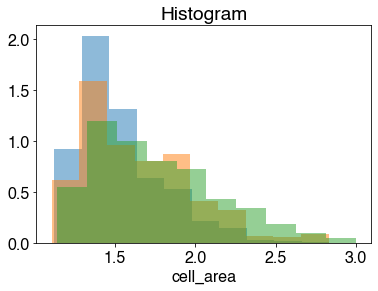

In [23]:
np.log10(cell_area1_cape.max(dim='times')).plot.hist(density=True, alpha=0.5)
np.log10(cell_area2_cape.max(dim='times')).plot.hist(density=True, alpha=0.5)
np.log10(cell_area3_cape.max(dim='times')).plot.hist(density=True, alpha=0.5)

In [24]:
bin_cellarea = np.linspace(1, 3, 20)
bin_maxdbz = np.linspace(10, 70, 20)
bin_ctt = np.linspace(175,280,20)
bin_eth = np.linspace(0,20,21)
bin_cth = np.linspace(0,20,21)
bin_tir = np.linspace(180,300,21)
bin_ctp = np.linspace(80,900,21)

# hist2d_cellarea_maxdbz, bin_cellarea, bin_maxdbz = np.histogram2d(np.log10(stats.cell_area).max(dim='times'), stats.maxdbz.max(dim='times'), bins=20)
hist2d_cellarea_maxdbz, xbin, ybin = np.histogram2d(np.log10(stats.cell_area).max(dim='times'), stats.maxdbz.max(dim='times'), bins=[bin_cellarea, bin_maxdbz])
hist2d_minctt_maxdbz, xbin, ybin = np.histogram2d(stats.cloud_top_temperature_min.min(dim='times'), stats.maxdbz.max(dim='times'), bins=[bin_ctt, bin_maxdbz])
hist2d_eth20_maxdbz, xbin, ybin = np.histogram2d(stats.maxETH_20dbz.max(dim='times'), stats.maxdbz.max(dim='times'), bins=[bin_eth, bin_maxdbz])
hist2d_cellarea_eth20, xbin, ybin = np.histogram2d(np.log10(stats.cell_area).max(dim='times'), stats.maxETH_20dbz.max(dim='times'), bins=[bin_cellarea, bin_eth])
hist2d_maxcth_maxdbz, xbin, ybin = np.histogram2d(stats.cloud_top_height_max.max(dim='times'), stats.maxdbz.max(dim='times'), bins=[bin_cth, bin_maxdbz])
hist2d_mintir_maxdbz, xbin, ybin = np.histogram2d(stats.temperature_ir_min.min(dim='times'), stats.maxdbz.max(dim='times'), bins=[bin_tir, bin_maxdbz])
hist2d_minctp_maxdbz, xbin, ybin = np.histogram2d(stats.cloud_top_pressure_min.min(dim='times'), stats.maxdbz.max(dim='times'), bins=[bin_tir, bin_maxdbz])

hist2d_cellarea_maxcth, xbin, ybin = np.histogram2d(np.log10(stats.cell_area).max(dim='times'), stats.cloud_top_height_max.max(dim='times'), bins=[bin_cellarea, bin_cth])
hist2d_cellarea_minctt, xbin, ybin = np.histogram2d(np.log10(stats.cell_area).max(dim='times'), stats.cloud_top_temperature_min.min(dim='times'), bins=[bin_cellarea, bin_ctt])
hist2d_cellarea_mintir, xbin, ybin = np.histogram2d(np.log10(stats.cell_area).max(dim='times'), stats.temperature_ir_min.min(dim='times'), bins=[bin_cellarea, bin_tir])
hist2d_cellarea_minctp, xbin, ybin = np.histogram2d(np.log10(stats.cell_area).max(dim='times'), stats.cloud_top_pressure_min.min(dim='times'), bins=[bin_cellarea, bin_ctp])

In [25]:
def plot_jointhist_4panel(data_arr, xbins, ybins, cmap, xlabels, ylabels, titles, cblabels, figname, normal=None):

    mpl.rcParams['font.size'] = 13
    mpl.rcParams['font.family'] = 'Helvetica'
    mpl.rcParams['figure.facecolor'] = 'white'
    fig, axes = plt.subplots(2, 2, figsize=(10, 8), dpi=100)

    for row in range(2):
        for col in range(2):
            ax = axes[row, col]
            Zm = np.ma.masked_where(data_arr[row][col] <= 0, data_arr[row][col])
            # Normalize colormap
            if normal is not None:
                norm = mpl.colors.LogNorm(vmin=Zm.min(), vmax=Zm.max())
            else:
                norm = None
            pcm = ax.pcolormesh(xbins[row][col], ybins[row][col], Zm, norm=norm, cmap=cmap)
            cb = plt.colorbar(pcm, ax=ax, label=cblabels[row][col])
            ax.grid(ls='--')
            ax.set_xlabel(xlabels[row][col])
            ax.set_ylabel(ylabels[row][col])
#             ax.set_title(titles[row][col], loc='left')
    
    fig.tight_layout()
    fig.savefig(figname, bbox_inches='tight', dpi=300)
    
    return fig

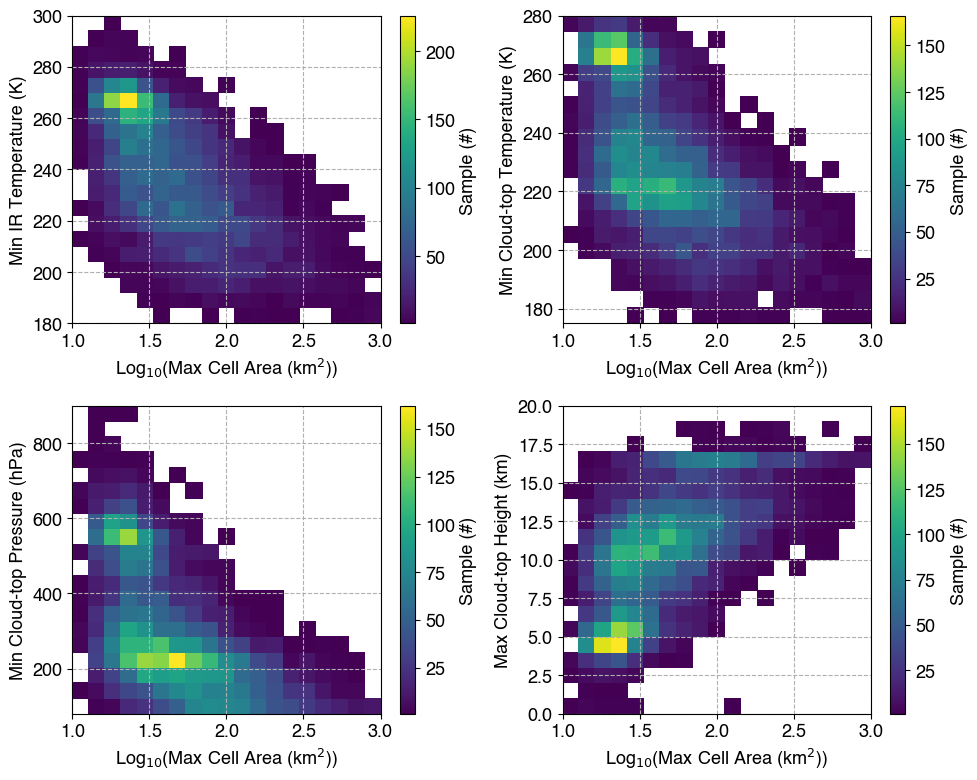

In [26]:
data_arr = [[hist2d_cellarea_mintir.transpose(), hist2d_cellarea_minctt.transpose()], 
            [hist2d_cellarea_minctp.transpose(), hist2d_cellarea_maxcth.transpose(), ]]
xbins = [[bin_cellarea, bin_cellarea], [bin_cellarea, bin_cellarea]]
ybins = [[bin_tir, bin_ctt],[bin_ctp, bin_cth]]
cmap = 'viridis'
xlabels = [['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))'], 
           ['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))']]
ylabels = [['Min IR Temperature (K)', 'Min Cloud-top Temperature (K)'], ['Min Cloud-top Pressure (hPa)', 'Max Cloud-top Height (km)']]
titles = [[''], []]
cblabels = [['Sample (#)', 'Sample (#)'], ['Sample (#)', 'Sample (#)']]
figname = f'{figdir_jointhist}JointHist_MaxCellArea_vs_GOESCloudTopStats.png'
fig = plot_jointhist_4panel(data_arr, xbins, ybins, cmap, xlabels, ylabels, titles, cblabels, figname)
# figname = f'{figdir_jointhist}JointHist_MaxCellArea_vs_GOESCloudTopStats_LogScale.png'
# fig = plot_jointhist_4panel(data_arr, xbins, ybins, cmap, xlabels, ylabels, titles, cblabels, figname, normal=True)

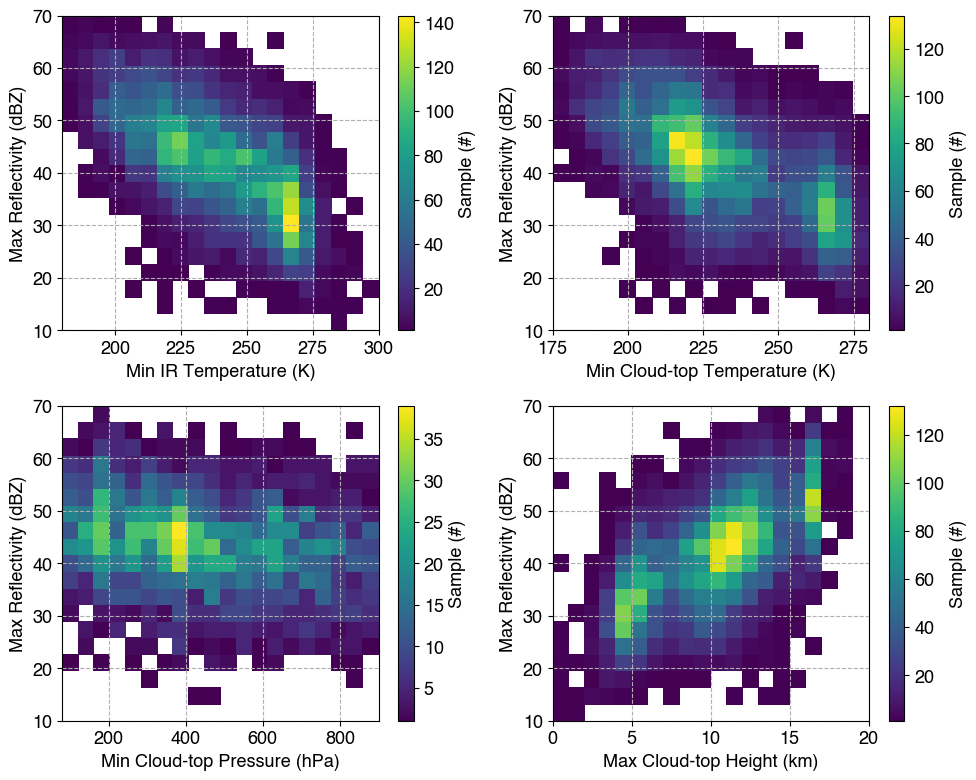

In [27]:
data_arr = [[hist2d_mintir_maxdbz.transpose(), hist2d_minctt_maxdbz.transpose()], 
            [hist2d_minctp_maxdbz.transpose(), hist2d_maxcth_maxdbz.transpose(), ]]
xbins = [[bin_tir, bin_ctt],[bin_ctp, bin_cth]]
ybins = [[bin_maxdbz, bin_maxdbz], [bin_maxdbz, bin_maxdbz]]
cmap = 'viridis'
xlabels = [['Min IR Temperature (K)', 'Min Cloud-top Temperature (K)'], ['Min Cloud-top Pressure (hPa)', 'Max Cloud-top Height (km)']]
ylabels = [['Max Reflectivity (dBZ)', 'Max Reflectivity (dBZ)'], ['Max Reflectivity (dBZ)', 'Max Reflectivity (dBZ)']]
titles = [[''], []]
cblabels = [['Sample (#)', 'Sample (#)'], ['Sample (#)', 'Sample (#)']]
figname = f'{figdir_jointhist}JointHist_MaxDBZ_vs_GOESCloudTopStats.png'
fig = plot_jointhist_4panel(data_arr, xbins, ybins, cmap, xlabels, ylabels, titles, cblabels, figname)
# figname = f'{figdir_jointhist}JointHist_MaxDBZ_vs_CellStats_LogScale.png'
# fig = plot_jointhist_4panel(data_arr, xbins, ybins, cmap, xlabels, ylabels, titles, cblabels, figname, normal=True)

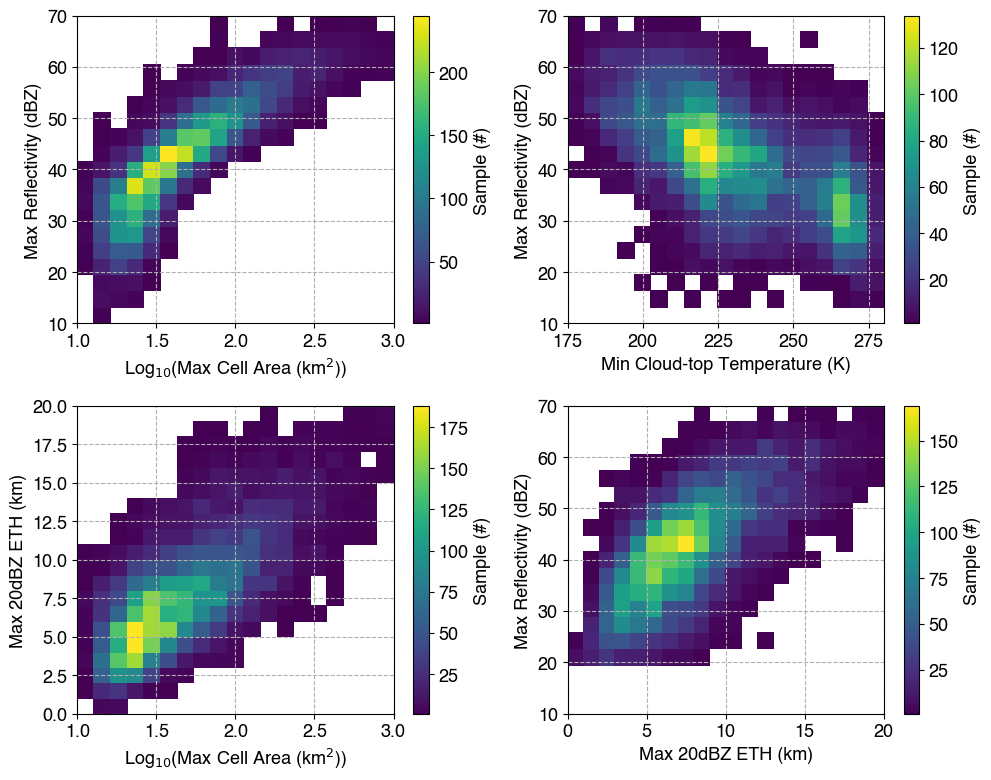

In [28]:
data_arr = [[hist2d_cellarea_maxdbz.transpose(), hist2d_minctt_maxdbz.transpose()], 
            [hist2d_cellarea_eth20.transpose(), hist2d_eth20_maxdbz.transpose(), ]]
xbins = [[bin_cellarea, bin_ctt],[bin_cellarea, bin_eth]]
ybins = [[bin_maxdbz, bin_maxdbz], [bin_eth, bin_maxdbz]]
cmap = 'viridis'
xlabels = [['Log$_{10}$(Max Cell Area (km$^2$))', 'Min Cloud-top Temperature (K)'], ['Log$_{10}$(Max Cell Area (km$^2$))', 'Max 20dBZ ETH (km)']]
ylabels = [['Max Reflectivity (dBZ)', 'Max Reflectivity (dBZ)'], ['Max 20dBZ ETH (km)', 'Max Reflectivity (dBZ)']]
titles = [[''], []]
cblabels = [['Sample (#)', 'Sample (#)'], ['Sample (#)', 'Sample (#)']]
figname = f'{figdir_jointhist}JointHist_MaxDBZ_vs_CellStats.png'
fig = plot_jointhist_4panel(data_arr, xbins, ybins, cmap, xlabels, ylabels, titles, cblabels, figname)
# figname = f'{figdir_jointhist}JointHist_MaxDBZ_vs_CellStats_LogScale.png'
# fig = plot_jointhist_4panel(data_arr, xbins, ybins, cmap, xlabels, ylabels, titles, cblabels, figname, normal=True)

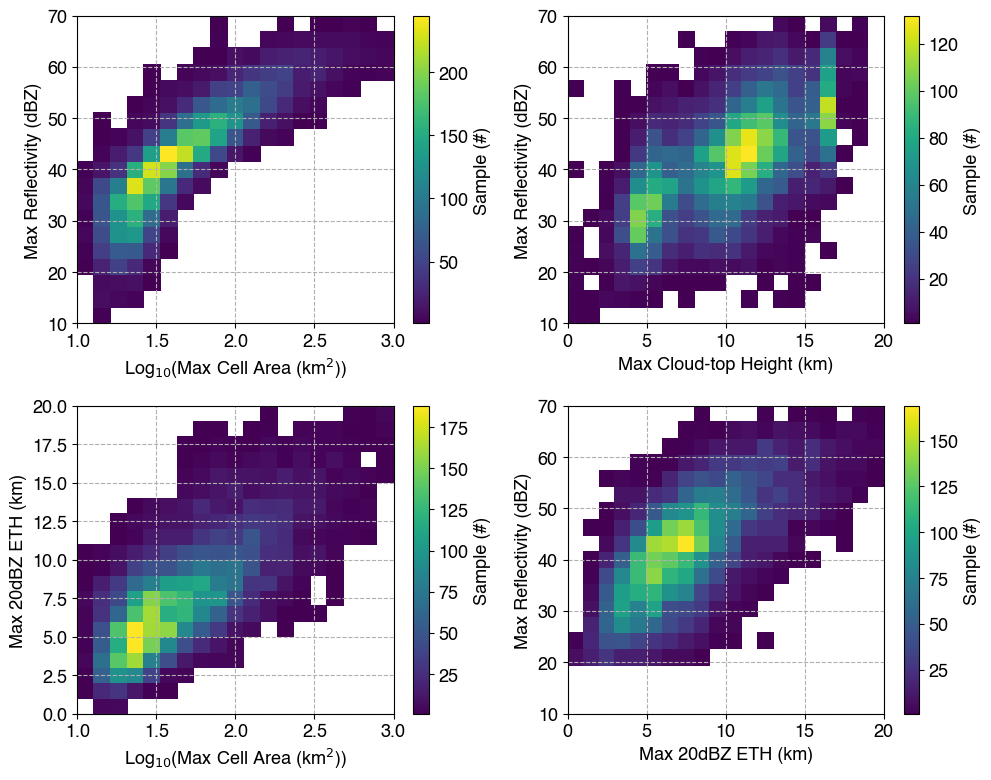

In [29]:
data_arr = [[hist2d_cellarea_maxdbz.transpose(), hist2d_maxcth_maxdbz.transpose()], 
            [hist2d_cellarea_eth20.transpose(), hist2d_eth20_maxdbz.transpose(), ]]
xbins = [[bin_cellarea, bin_cth],[bin_cellarea, bin_eth]]
ybins = [[bin_maxdbz, bin_maxdbz], [bin_eth, bin_maxdbz]]
cmap = 'viridis'
xlabels = [['Log$_{10}$(Max Cell Area (km$^2$))', 'Max Cloud-top Height (km)'], ['Log$_{10}$(Max Cell Area (km$^2$))', 'Max 20dBZ ETH (km)']]
ylabels = [['Max Reflectivity (dBZ)', 'Max Reflectivity (dBZ)'], ['Max 20dBZ ETH (km)', 'Max Reflectivity (dBZ)']]
titles = [[''], []]
cblabels = [['Sample (#)', 'Sample (#)'], ['Sample (#)', 'Sample (#)']]
figname = f'{figdir_jointhist}JointHist_MaxDBZ_vs_CellStats2.png'
fig = plot_jointhist_4panel(data_arr, xbins, ybins, cmap, xlabels, ylabels, titles, cblabels, figname)
# figname = f'{figdir_jointhist}JointHist_MaxDBZ_vs_CellStats_LogScale.png'
# fig = plot_jointhist_4panel(data_arr, xbins, ybins, cmap, xlabels, ylabels, titles, cblabels, figname, normal=True)

In [30]:
def quantiles1d_by2cond(in_var, x_cond_var, x_cond_range, y_cond_var, y_cond_range, 
                       loc_var, loc_range, merge_tracknumber, split_tracknumber, quantiles, min_nsample=5):
    nbins_x = len(x_cond_range)-1
    nbins_y = len(y_cond_range)-1
    npts = len(quantiles)
    out_var_pts = np.full((npts, nbins_y, nbins_x), np.nan, dtype=float)
    out_var_avg = np.full((nbins_y, nbins_x), np.nan, dtype=float)
    nsamples = np.full((nbins_y, nbins_x), 0, dtype=np.int32)
    # Loop over two conditional variable bins
    for xbin in range(nbins_x):
        for ybin in range(nbins_y):
#             in_var_cond = in_var.where((loc_var >= loc_range[0]) & (loc_var <= loc_range[1]) &
#                                        (x_cond_var > x_cond_range[xbin]) & (x_cond_var <= x_cond_range[xbin+1]) &
#                                        (y_cond_var > y_cond_range[ybin]) & (y_cond_var <= y_cond_range[ybin+1]) &
#                                        (np.isnan(merge_tracknumber)) & (np.isnan(split_tracknumber)), drop=True)
            in_var_cond = in_var.where((loc_var >= loc_range[0]) & (loc_var <= loc_range[1]) &
                                       (x_cond_var > x_cond_range[xbin]) & (x_cond_var <= x_cond_range[xbin+1]) &
                                       (y_cond_var > y_cond_range[ybin]) & (y_cond_var <= y_cond_range[ybin+1]), drop=True)
            nsamples[ybin, xbin] = in_var_cond.sizes['tracks']
            if nsamples[ybin, xbin] >= min_nsample:
                out_var_pts[:, ybin, xbin] = in_var_cond.quantile(quantiles, dim='tracks', skipna=True).values
                out_var_avg[ybin, xbin] = in_var_cond.mean(dim='tracks').values
    return (nsamples, out_var_pts, out_var_avg)

In [31]:
def quantiles2d_by2cond(in_var, x_cond_var, x_cond_range, y_cond_var, y_cond_range, 
                       loc_var, loc_range, merge_tracknumber, split_tracknumber, quantiles, min_nsample=5):
    nbins_x = len(x_cond_range)-1
    nbins_y = len(y_cond_range)-1
    npts = len(quantiles)
    out_var_pts = np.full((npts, nbins_y, nbins_x), np.nan, dtype=float)
    out_var_avg = np.full((nbins_y, nbins_x), np.nan, dtype=float)
    nsamples = np.full((nbins_y, nbins_x), 0, dtype=np.int32)
#     print(nsamples.shape)
    # Loop over two conditional variable bins
    for xbin in range(nbins_x):
        for ybin in range(nbins_y):
#             print(xbin, ybin)
#             in_var_cond = in_var.where((loc_var >= loc_range[0]) & (loc_var <= loc_range[1]) &
#                                        (x_cond_var > x_cond_range[xbin]) & (x_cond_var <= x_cond_range[xbin+1]) &
#                                        (y_cond_var > y_cond_range[ybin]) & (y_cond_var <= y_cond_range[ybin+1]) &
#                                        (np.isnan(merge_tracknumber)) & (np.isnan(split_tracknumber)), drop=True)
            in_var_cond = in_var.where((loc_var >= loc_range[0]) & (loc_var <= loc_range[1]) &
                                       (x_cond_var > x_cond_range[xbin]) & (x_cond_var <= x_cond_range[xbin+1]) &
                                       (y_cond_var > y_cond_range[ybin]) & (y_cond_var <= y_cond_range[ybin+1]), drop=True)
            nsamples[ybin, xbin] = in_var_cond.sizes['tracks']
            if nsamples[ybin, xbin] >= min_nsample:
                out_var_pts[:, ybin, xbin] = in_var_cond.max(dim='times').quantile(quantiles, dim='tracks', skipna=True).values
                out_var_avg[ybin, xbin] = in_var_cond.max(dim='times').mean(dim='tracks').values
    return (nsamples, out_var_pts, out_var_avg)

In [32]:
2 * np.sqrt(3**10 / np.pi)

274.1961376042096

In [33]:
quantiles_2d = [0.25,0.5,0.75,0.9,0.95]

# Calculate single environment parameter stats as joint functions of cell statistics
# Get lifetime max cell statistics
max_cellarea_lifetime = np.log10(stats.cell_area).max(dim='times')
max_dbz_lifetime = stats.maxdbz.max(dim='times')
max_eth20_lifetime = stats.maxETH_20dbz.max(dim='times')
max_eth30_lifetime = stats.maxETH_30dbz.max(dim='times')
min_ctt_lifetime = stats.cloud_top_temperature_min.min(dim='times')

# Set min number of samples in each bin
min_ns = 5
nsamples_cellareamaxdbz, cape_cellareamaxdbz_pts, cape_cellareamaxdbz_avg = quantiles1d_by2cond(cape, max_cellarea_lifetime, bin_cellarea, max_dbz_lifetime, bin_maxdbz, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareamaxdbz, lnb_z_cellareamaxdbz_pts, lnb_z_cellareamaxdbz_avg = quantiles1d_by2cond(lnb_z, max_cellarea_lifetime, bin_cellarea, max_dbz_lifetime, bin_maxdbz, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareamaxdbz, cin_cellareamaxdbz_pts, cin_cellareamaxdbz_avg = quantiles1d_by2cond(cin, max_cellarea_lifetime, bin_cellarea, max_dbz_lifetime, bin_maxdbz, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareamaxdbz, lfc_z_cellareamaxdbz_pts, lfc_z_cellareamaxdbz_avg = quantiles1d_by2cond(lfc_z, max_cellarea_lifetime, bin_cellarea, max_dbz_lifetime, bin_maxdbz, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareamaxdbz, lpl_z_cellareamaxdbz_pts, lpl_z_cellareamaxdbz_avg = quantiles1d_by2cond(lpl_z, max_cellarea_lifetime, bin_cellarea, max_dbz_lifetime, bin_maxdbz, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareamaxdbz, q850p_cellareamaxdbz_pts, q850p_cellareamaxdbz_avg = quantiles1d_by2cond(q850p, max_cellarea_lifetime, bin_cellarea, max_dbz_lifetime, bin_maxdbz, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareamaxdbz, q700p_cellareamaxdbz_pts, q700p_cellareamaxdbz_avg = quantiles1d_by2cond(q700p, max_cellarea_lifetime, bin_cellarea, max_dbz_lifetime, bin_maxdbz, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareamaxdbz, rh700p_cellareamaxdbz_pts, rh700p_cellareamaxdbz_avg = quantiles1d_by2cond(rh700p, max_cellarea_lifetime, bin_cellarea, max_dbz_lifetime, bin_maxdbz, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareamaxdbz, rh500p_cellareamaxdbz_pts, rh500p_cellareamaxdbz_avg = quantiles1d_by2cond(rh500p, max_cellarea_lifetime, bin_cellarea, max_dbz_lifetime, bin_maxdbz, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

In [34]:
nsamples_cellareaeth20, cape_cellareaeth20_pts, cape_cellareaeth20_avg = quantiles1d_by2cond(cape, max_cellarea_lifetime, bin_cellarea, max_eth20_lifetime, bin_eth, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareaeth20, lnb_z_cellareaeth20_pts, lnb_z_cellareaeth20_avg = quantiles1d_by2cond(lnb_z, max_cellarea_lifetime, bin_cellarea, max_eth20_lifetime, bin_eth, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareaeth20, cin_cellareaeth20_pts, cin_cellareaeth20_avg = quantiles1d_by2cond(cin, max_cellarea_lifetime, bin_cellarea, max_eth20_lifetime, bin_eth, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareaeth20, lfc_z_cellareaeth20_pts, lfc_z_cellareaeth20_avg = quantiles1d_by2cond(lfc_z, max_cellarea_lifetime, bin_cellarea, max_eth20_lifetime, bin_eth, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareaeth20, lpl_z_cellareaeth20_pts, lpl_z_cellareaeth20_avg = quantiles1d_by2cond(lpl_z, max_cellarea_lifetime, bin_cellarea, max_eth20_lifetime, bin_eth, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareaeth20, q850p_cellareaeth20_pts, q850p_cellareaeth20_avg = quantiles1d_by2cond(q850p, max_cellarea_lifetime, bin_cellarea, max_eth20_lifetime, bin_eth, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareaeth20, q700p_cellareaeth20_pts, q700p_cellareaeth20_avg = quantiles1d_by2cond(q700p, max_cellarea_lifetime, bin_cellarea, max_eth20_lifetime, bin_eth, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareaeth20, rh700p_cellareaeth20_pts, rh700p_cellareaeth20_avg = quantiles1d_by2cond(rh700p, max_cellarea_lifetime, bin_cellarea, max_eth20_lifetime, bin_eth, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareaeth20, rh500p_cellareaeth20_pts, rh500p_cellareaeth20_avg = quantiles1d_by2cond(rh500p, max_cellarea_lifetime, bin_cellarea, max_eth20_lifetime, bin_eth, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

/global/cfs/cdirs/m1867/zfeng/envs/py38/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/global/cfs/cdirs/m1867/zfeng/envs/py38/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/global/cfs/cdirs/m1867/zfeng/envs/py38/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/global/cfs/cdirs/m1867/zfeng/envs/py38/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/global/cfs/cdirs/m1867/zfeng/envs/py38/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


In [35]:
nsamples_cellareactt, cape_cellareactt_pts, cape_cellareactt_avg = quantiles1d_by2cond(cape, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, lnb_z_cellareactt_pts, lnb_z_cellareactt_avg = quantiles1d_by2cond(lnb_z, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, cin_cellareactt_pts, cin_cellareactt_avg = quantiles1d_by2cond(cin, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, lfc_z_cellareactt_pts, lfc_z_cellareactt_avg = quantiles1d_by2cond(lfc_z, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, lpl_z_cellareactt_pts, lpl_z_cellareactt_avg = quantiles1d_by2cond(lpl_z, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, q850p_cellareactt_pts, q850p_cellareactt_avg = quantiles1d_by2cond(q850p, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, q700p_cellareactt_pts, q700p_cellareactt_avg = quantiles1d_by2cond(q700p, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, rh700p_cellareactt_pts, rh700p_cellareactt_avg = quantiles1d_by2cond(rh700p, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, rh500p_cellareactt_pts, rh500p_cellareactt_avg = quantiles1d_by2cond(rh500p, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

In [36]:
nsamples_cellareactt, shear3mag_cellareactt_pts, shear3mag_cellareactt_avg = quantiles1d_by2cond(shear3mag, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, shear6mag_cellareactt_pts, shear6mag_cellareactt_avg = quantiles1d_by2cond(shear6mag, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, u700p_cellareactt_pts, u700p_cellareactt_avg = quantiles1d_by2cond(u700p, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, v700p_cellareactt_pts, v700p_cellareactt_avg = quantiles1d_by2cond(v700p, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, u850p_cellareactt_pts, u850p_cellareactt_avg = quantiles1d_by2cond(u850p, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, v850p_cellareactt_pts, v850p_cellareactt_avg = quantiles1d_by2cond(v850p, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

In [37]:
def plot_filledjointhist_4panel(data_arr, xbins, ybins, levels, cmap, xlabels, ylabels, titles, cblabels, figname):

    mpl.rcParams['font.size'] = 12
    mpl.rcParams['font.family'] = 'Helvetica'
    mpl.rcParams['figure.facecolor'] = 'white'
    fig, axes = plt.subplots(2, 2, figsize=(10, 8), dpi=100)

    for row in range(2):
        for col in range(2):
            ax = axes[row, col]
            Zm = np.ma.masked_where(data_arr[row][col] <= 0, data_arr[row][col])
            # Normalize colormap
            cmap = plt.get_cmap(cmap)
            norm = mpl.colors.BoundaryNorm(levels[row][col], ncolors=cmap.N)
            pcm = ax.pcolormesh(xbins[row][col], ybins[row][col], Zm, norm=norm, cmap=cmap)
#             cnt = ax.contour(xbins[row][col][:-1], ybins[row][col][:-1], nsample_arr, levels=levels_ct, colors='g')
            cb = plt.colorbar(pcm, ax=ax, label=cblabels[row][col])
            ax.grid(ls='--')
            ax.set_xlabel(xlabels[row][col])
            ax.set_ylabel(ylabels[row][col])
            ax.set_title(titles[row][col], loc='left')
    
    fig.tight_layout()
    fig.savefig(figname, bbox_inches='tight', dpi=300)
    
    return fig

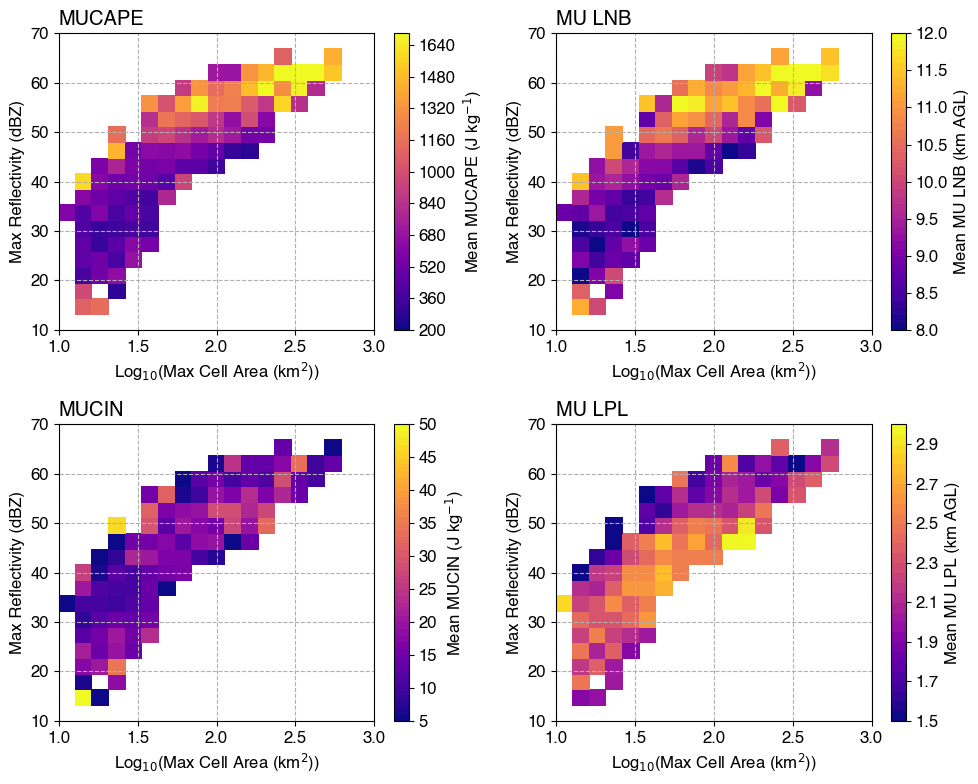

In [38]:
data_arr = [[cape_cellareamaxdbz_avg, lnb_z_cellareamaxdbz_avg], 
            [cin_cellareamaxdbz_avg, lpl_z_cellareamaxdbz_avg]]
xbins = [[bin_cellarea, bin_cellarea],[bin_cellarea, bin_cellarea]]
ybins = [[bin_maxdbz, bin_maxdbz], [bin_maxdbz, bin_maxdbz]]
levels = [[np.arange(200,1701,10), np.arange(8,12.1,0.1)], 
          [np.arange(5,50.1,1), np.arange(1.5, 3.01, 0.05)]]
levels_ct = [min_ns, 10,20,50,100,200]
cmap = 'plasma'
xlabels = [['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))'], 
           ['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))']]
ylabels = [['Max Reflectivity (dBZ)', 'Max Reflectivity (dBZ)'], 
           ['Max Reflectivity (dBZ)', 'Max Reflectivity (dBZ)']]
titles = [['MUCAPE', 'MU LNB'], ['MUCIN', 'MU LPL']]
cblabels = [['Mean MUCAPE (J kg$^{-1}$)', 'Mean MU LNB (km AGL)'], 
            ['Mean MUCIN (J kg$^{-1}$)', 'Mean MU LPL (km AGL)']]
figname = f'{figdir_jointhist}ParcelStats_MaxArea+MaxDBZ.png'
fig = plot_filledjointhist_4panel(data_arr, xbins, ybins, levels, cmap, xlabels, ylabels, titles, cblabels, figname)

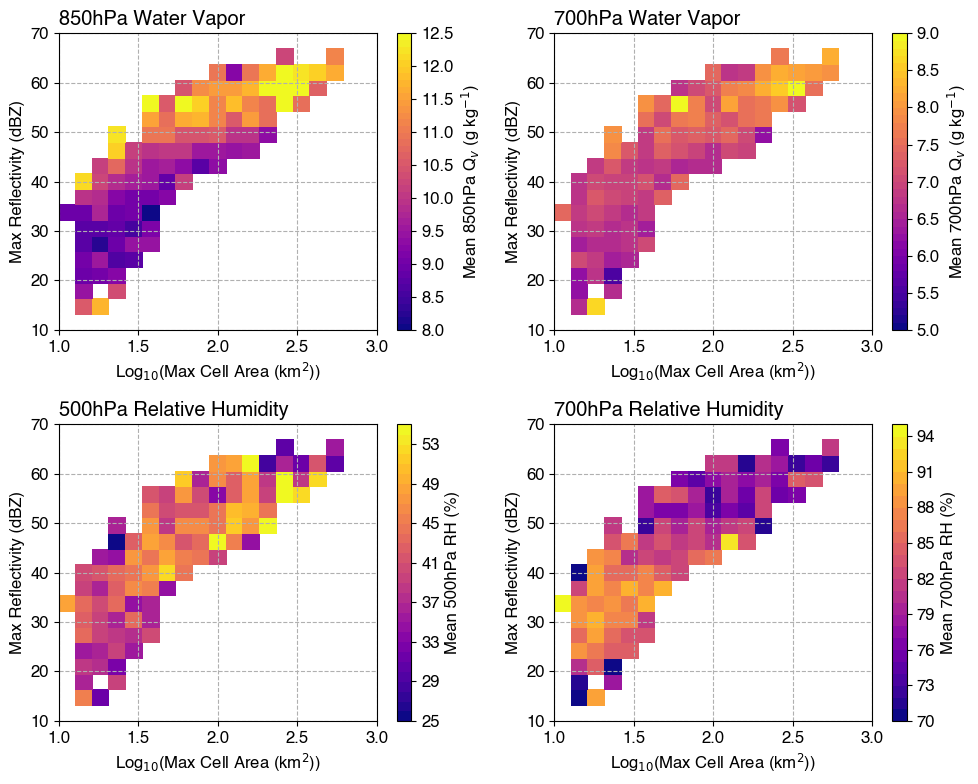

In [39]:
data_arr = [[q850p_cellareamaxdbz_avg, q700p_cellareamaxdbz_avg], 
            [rh500p_cellareamaxdbz_avg, rh700p_cellareamaxdbz_avg]]
xbins = [[bin_cellarea, bin_cellarea],[bin_cellarea, bin_cellarea]]
ybins = [[bin_maxdbz, bin_maxdbz], [bin_maxdbz, bin_maxdbz]]
levels = [[np.arange(8, 12.51, 0.1), np.arange(5, 9.01, 0.1)], 
          [np.arange(25, 55.1, 1), np.arange(70, 95.01, 1)]]
cmap = 'plasma'
xlabels = [['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))'], 
           ['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))']]
ylabels = [['Max Reflectivity (dBZ)', 'Max Reflectivity (dBZ)'], 
           ['Max Reflectivity (dBZ)', 'Max Reflectivity (dBZ)']]
titles = [['850hPa Water Vapor', '700hPa Water Vapor'], ['500hPa Relative Humidity', '700hPa Relative Humidity']]
cblabels = [['Mean 850hPa Q$_v$ (g kg$^{-1}$)', 'Mean 700hPa Q$_v$ (g kg$^{-1}$)'], 
            ['Mean 500hPa RH (%)', 'Mean 700hPa RH (%)']]
figname = f'{figdir_jointhist}HumidityStats_MaxArea+MaxDBZ.png'
fig = plot_filledjointhist_4panel(data_arr, xbins, ybins, levels, cmap, xlabels, ylabels, titles, cblabels, figname)

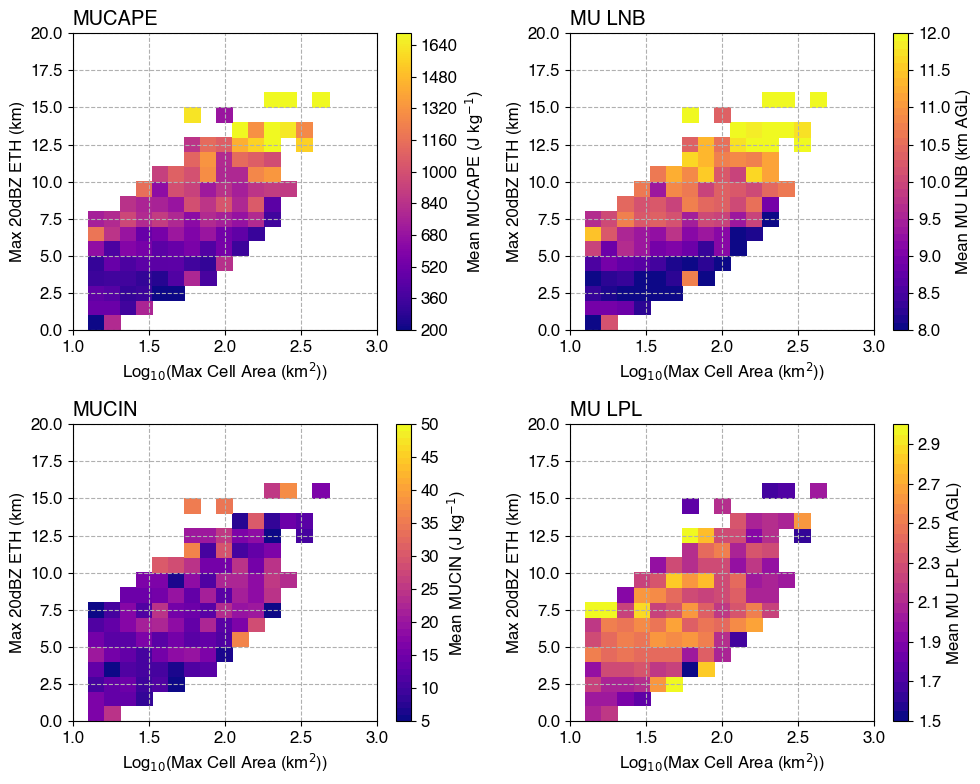

In [40]:
data_arr = [[cape_cellareaeth20_avg, lnb_z_cellareaeth20_avg], 
            [cin_cellareaeth20_avg, lpl_z_cellareaeth20_avg]]
xbins = [[bin_cellarea, bin_cellarea],[bin_cellarea, bin_cellarea]]
ybins = [[bin_eth, bin_eth], [bin_eth, bin_eth]]
levels = [[np.arange(200,1701,10), np.arange(8,12.1,0.1)], 
          [np.arange(5,50.1,1), np.arange(1.5, 3.01, 0.05)]]
cmap = 'plasma'
xlabels = [['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))'], 
           ['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))']]
ylabels = [['Max 20dBZ ETH (km)', 'Max 20dBZ ETH (km)'], 
           ['Max 20dBZ ETH (km)', 'Max 20dBZ ETH (km)']]
titles = [['MUCAPE', 'MU LNB'], ['MUCIN', 'MU LPL']]
cblabels = [['Mean MUCAPE (J kg$^{-1}$)', 'Mean MU LNB (km AGL)'], 
            ['Mean MUCIN (J kg$^{-1}$)', 'Mean MU LPL (km AGL)']]
figname = f'{figdir_jointhist}ParcelStats_MaxArea+MaxETH20.png'
fig = plot_filledjointhist_4panel(data_arr, xbins, ybins, levels, cmap, xlabels, ylabels, titles, cblabels, figname)

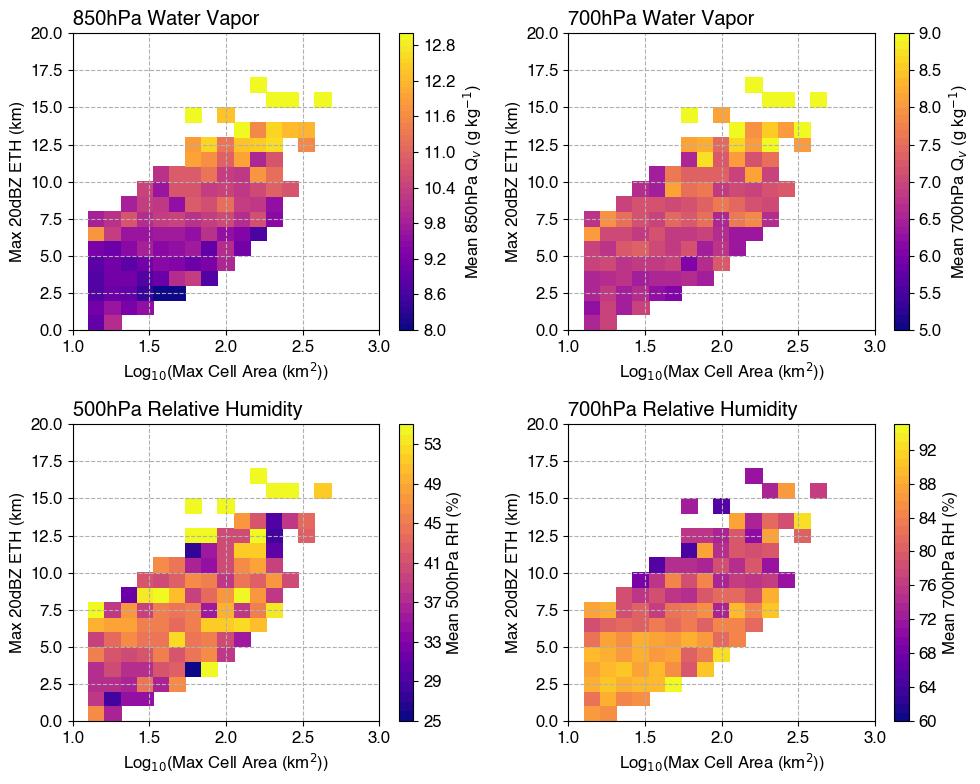

In [41]:
data_arr = [[q850p_cellareaeth20_avg, q700p_cellareaeth20_avg], 
            [rh500p_cellareaeth20_avg, rh700p_cellareaeth20_avg]]
xbins = [[bin_cellarea, bin_cellarea],[bin_cellarea, bin_cellarea]]
ybins = [[bin_eth, bin_eth], [bin_eth, bin_eth]]
levels = [[np.arange(8, 13.01, 0.1), np.arange(5, 9.01, 0.1)], 
          [np.arange(25, 55.1, 1), np.arange(60, 95.01, 1)]]
cmap = 'plasma'
xlabels = [['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))'], 
           ['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))']]
ylabels = [['Max 20dBZ ETH (km)', 'Max 20dBZ ETH (km)'], 
           ['Max 20dBZ ETH (km)', 'Max 20dBZ ETH (km)']]
titles = [['850hPa Water Vapor', '700hPa Water Vapor'], ['500hPa Relative Humidity', '700hPa Relative Humidity']]
cblabels = [['Mean 850hPa Q$_v$ (g kg$^{-1}$)', 'Mean 700hPa Q$_v$ (g kg$^{-1}$)'], 
            ['Mean 500hPa RH (%)', 'Mean 700hPa RH (%)']]
figname = f'{figdir_jointhist}HumidityStats_MaxArea+MaxETH20.png'
fig = plot_filledjointhist_4panel(data_arr, xbins, ybins, levels, cmap, xlabels, ylabels, titles, cblabels, figname)

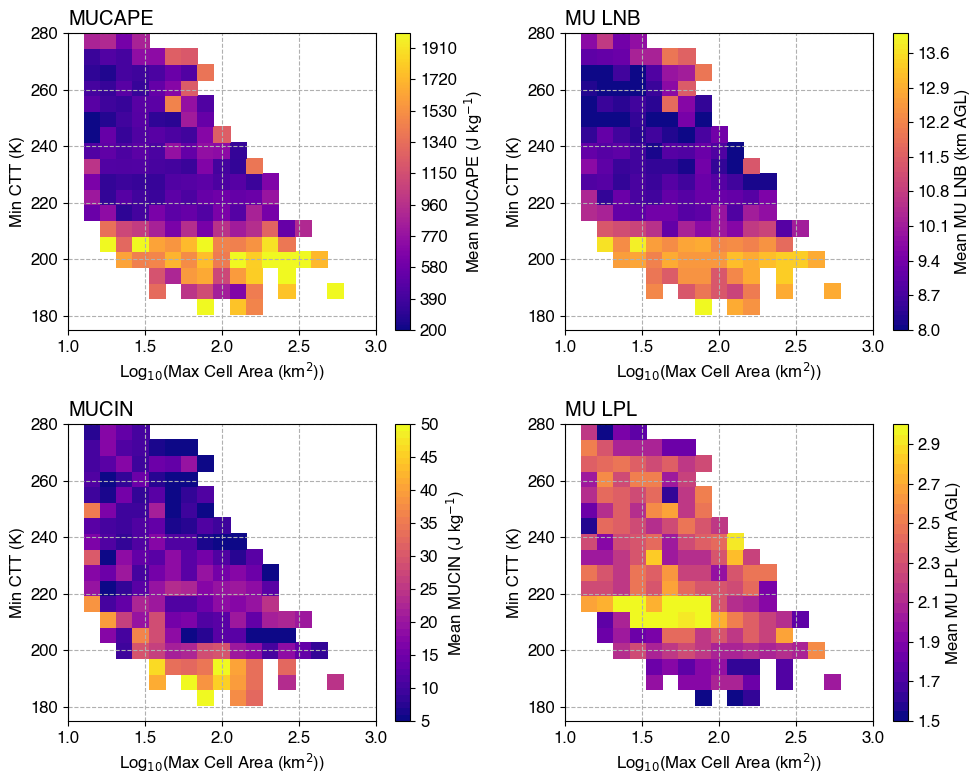

In [42]:
data_arr = [[cape_cellareactt_avg, lnb_z_cellareactt_avg], 
            [cin_cellareactt_avg, lpl_z_cellareactt_avg]]
xbins = [[bin_cellarea, bin_cellarea],[bin_cellarea, bin_cellarea]]
ybins = [[bin_ctt, bin_ctt], [bin_ctt, bin_ctt]]
levels = [[np.arange(200,2001,10), np.arange(8,14.1,0.1)], 
          [np.arange(5,50.1,1), np.arange(1.5, 3.01, 0.05)]]
cmap = 'plasma'
xlabels = [['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))'], 
           ['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))']]
ylabels = [['Min CTT (K)', 'Min CTT (K)'], 
           ['Min CTT (K)', 'Min CTT (K)']]
titles = [['MUCAPE', 'MU LNB'], ['MUCIN', 'MU LPL']]
cblabels = [['Mean MUCAPE (J kg$^{-1}$)', 'Mean MU LNB (km AGL)'], 
            ['Mean MUCIN (J kg$^{-1}$)', 'Mean MU LPL (km AGL)']]
figname = f'{figdir_jointhist}ParcelStats_MaxArea+MinCTT.png'
fig = plot_filledjointhist_4panel(data_arr, xbins, ybins, levels, cmap, xlabels, ylabels, titles, cblabels, figname)

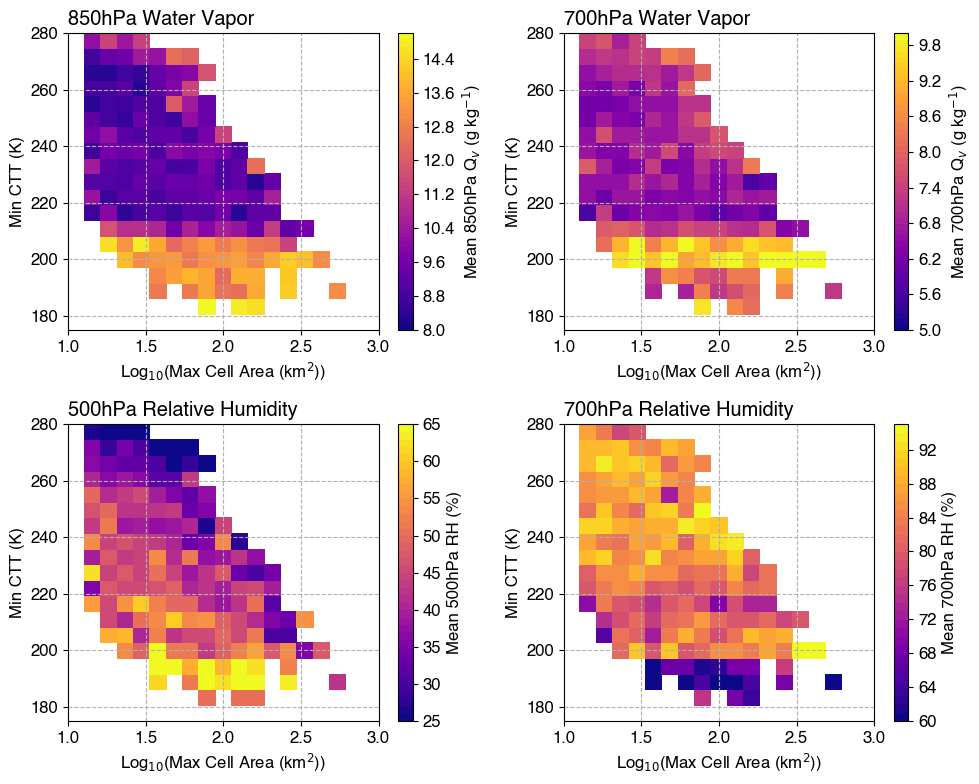

In [43]:
data_arr = [[q850p_cellareactt_avg, q700p_cellareactt_avg], 
            [rh500p_cellareactt_avg, rh700p_cellareactt_avg]]
xbins = [[bin_cellarea, bin_cellarea],[bin_cellarea, bin_cellarea]]
ybins = [[bin_ctt, bin_ctt], [bin_ctt, bin_ctt]]
levels = [[np.arange(8, 15.01, 0.1), np.arange(5, 10.01, 0.1)], 
          [np.arange(25, 65.1, 1), np.arange(60, 95.01, 1)]]
cmap = 'plasma'
xlabels = [['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))'], 
           ['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))']]
ylabels = [['Min CTT (K)', 'Min CTT (K)'], 
           ['Min CTT (K)', 'Min CTT (K)']]
titles = [['850hPa Water Vapor', '700hPa Water Vapor'], ['500hPa Relative Humidity', '700hPa Relative Humidity']]
cblabels = [['Mean 850hPa Q$_v$ (g kg$^{-1}$)', 'Mean 700hPa Q$_v$ (g kg$^{-1}$)'], 
            ['Mean 500hPa RH (%)', 'Mean 700hPa RH (%)']]
figname = f'{figdir_jointhist}HumidityStats_MaxArea+MinCTT.png'
fig = plot_filledjointhist_4panel(data_arr, xbins, ybins, levels, cmap, xlabels, ylabels, titles, cblabels, figname)

In [44]:
def plot_filledjointhist_6panel(data_arr, xbins, ybins, levels, cmap, xlabels, ylabels, titles, cblabels, figname):

    mpl.rcParams['font.size'] = 12
    mpl.rcParams['font.family'] = 'Helvetica'
    mpl.rcParams['figure.facecolor'] = 'white'
    fig, axes = plt.subplots(3, 2, figsize=(10, 12), dpi=100)

    for row in range(3):
        for col in range(2):
            ax = axes[row, col]
#             Zm = np.ma.masked_where(data_arr[row][col] <= 0, data_arr[row][col])
            Zm = np.ma.masked_invalid(data_arr[row][col])
            # Normalize colormap
            cmap = plt.get_cmap(cmap)
            norm = mpl.colors.BoundaryNorm(levels[row][col], ncolors=cmap.N)
            pcm = ax.pcolormesh(xbins[row][col], ybins[row][col], Zm, norm=norm, cmap=cmap)
            cb = plt.colorbar(pcm, ax=ax, label=cblabels[row][col])
            ax.grid(ls='--')
            ax.set_xlabel(xlabels[row][col])
            ax.set_ylabel(ylabels[row][col])
            ax.set_title(titles[row][col], loc='left')
    
    fig.tight_layout()
    fig.savefig(figname, bbox_inches='tight', dpi=300)
    
    return fig

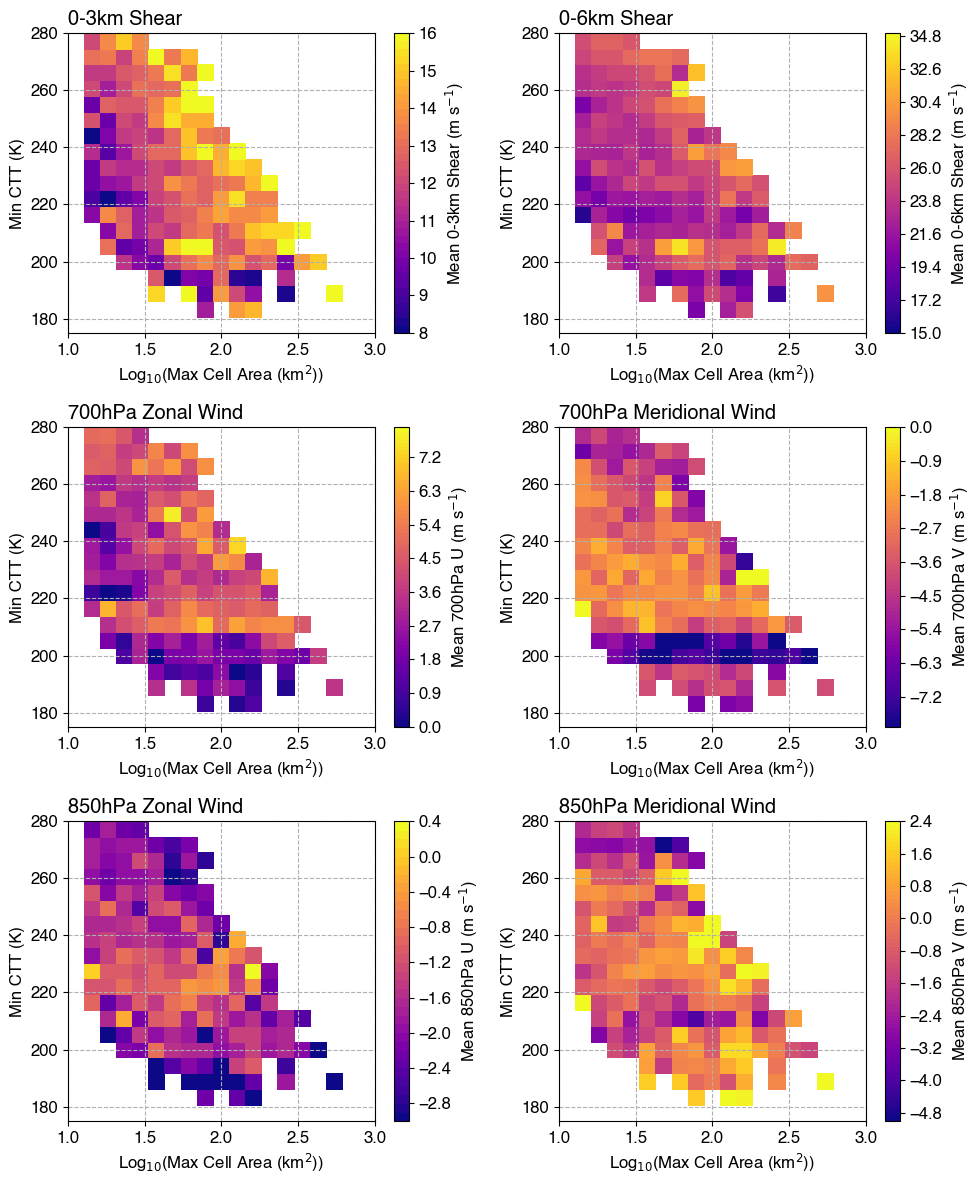

In [45]:
data_arr = [[shear3mag_cellareactt_avg, shear6mag_cellareactt_avg], 
            [u700p_cellareactt_avg, v700p_cellareactt_avg],
            [u850p_cellareactt_avg, v850p_cellareactt_avg]]
xbins = [[bin_cellarea, bin_cellarea],[bin_cellarea, bin_cellarea],[bin_cellarea, bin_cellarea]]
ybins = [[bin_ctt, bin_ctt], [bin_ctt, bin_ctt], [bin_ctt, bin_ctt]]
levels = [[np.arange(8, 16.01, 0.2), np.arange(15, 35.01, 0.2)], 
          [np.arange(0, 8.1, 0.1), np.arange(-8.0, 0.01, 0.1)],
          [np.arange(-3, 0.5, 0.1), np.arange(-5, 2.5, 0.1)]]
cmap = 'plasma'
xlabels = [['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))'], 
           ['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))'],
           ['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))']]
ylabels = [['Min CTT (K)', 'Min CTT (K)'], 
           ['Min CTT (K)', 'Min CTT (K)'],
           ['Min CTT (K)', 'Min CTT (K)']]
titles = [['0-3km Shear', '0-6km Shear'], 
          ['700hPa Zonal Wind', '700hPa Meridional Wind'],
          ['850hPa Zonal Wind', '850hPa Meridional Wind']]
cblabels = [['Mean 0-3km Shear (m s$^{-1}$)', 'Mean 0-6km Shear (m s$^{-1}$)'], 
            ['Mean 700hPa U (m s$^{-1}$)', 'Mean 700hPa V (m s$^{-1}$)'],
            ['Mean 850hPa U (m s$^{-1}$)', 'Mean 850hPa V (m s$^{-1}$)']]
figname = f'{figdir_jointhist}WindStats_MaxArea+MinCTT.png'
fig = plot_filledjointhist_6panel(data_arr, xbins, ybins, levels, cmap, xlabels, ylabels, titles, cblabels, figname)

In [46]:
# Find equal sample number bin values by quantiles
# quantile_bins = np.arange(0,1.01,0.2).tolist()
quantile_bins = [0,0.33,0.66,1]
# cape_qcut, cape_bins = pd.qcut(cape, 5, retbins=True)
cape_qcut, cape_bins = pd.qcut(cape, quantile_bins, retbins=True)
shear6mag_qcut, shear6mag_bins = pd.qcut(shear6mag, quantile_bins, retbins=True)
cape_bins = np.array(cape_bins)
shear6mag_bins = np.array(shear6mag_bins)
print(cape_bins)

# quantiles_2d = [0.25,0.5,0.75,0.9,0.95]
# cape_range = [50,400,900,4000]
# shear6mag_range = [0,20,28,50]
cape_range = cape_bins
shear6mag_range = shear6mag_bins

nsamples_capeshear6mag, lifetime_capeshear6mag_pts, lifetime_capeshear6mag_avg = quantiles1d_by2cond(lifetime, cape, cape_range, shear6mag, shear6mag_range,
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d)

nsamples_capeshear6mag, cell_area_capeshear6mag_pts, cell_area_capeshear6mag_avg = quantiles2d_by2cond(stats.cell_area, cape, cape_range, shear6mag, shear6mag_range,
                                                                          start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d)

nsamples_capeshear6mag, minctt_capeshear6mag_pts, minctt_capeshear6mag_avg = quantiles1d_by2cond(min_ctt_lifetime, cape, cape_range, shear6mag, shear6mag_range,
                                                                          start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d)

nsamples_capeshear6mag, max_dbz_capeshear6mag_pts, max_dbz_capeshear6mag_avg = quantiles1d_by2cond(max_dbz_lifetime, cape, cape_range, shear6mag, shear6mag_range,
                                                                          start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d)

nsamples_capeshear6mag, max_eth30_capeshear6mag_pts, max_eth30_capeshear6mag_avg = quantiles1d_by2cond(max_eth30_lifetime, cape, cape_range, shear6mag, shear6mag_range,
                                                                          start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d)

[2.08569132e-02 1.78265306e+02 6.86126221e+02 6.06525781e+03]


In [47]:
def plot_filledjointhist(data_arr, sample_arr, qntl, ticklabels, xlabel, ylabel, title, cblabel, figname):

    mpl.rcParams['font.size'] = 12
    mpl.rcParams['font.family'] = 'Helvetica'
    mpl.rcParams['figure.facecolor'] = 'white'
    fig, axes = plt.subplots(1, 1, figsize=(6, 5), dpi=150)

    ax1 = axes
    # plt.pcolormesh(cape_range, shear6mag_range, np.log10(cell_area_capeshear6mag_pts[idx,:,:]))
    pcm1 = ax1.pcolormesh(data_arr, cmap=cmap)
    # pcm1 = ax1.pcolormesh((cell_area_capeshear6mag_pts[idx,:,:]))
    cb1 = plt.colorbar(pcm1, ax=ax1, label=cblabel)
    ax1.set_xticks(np.arange(len(ticklabels)))
    ax1.set_yticks(np.arange(len(ticklabels)))
    ax1.set_xticklabels(ticklabels)
    ax1.set_yticklabels(ticklabels)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    for (i, j), z in np.ndenumerate(sample_arr):
        ax1.text(j+0.5, i+0.5, '{:0.0f}'.format(z), ha='center', va='center', color='white', fontsize=10)
    ax1.set_title(title, loc='left')
    ax1.text(0.02, 0.04, f'Sample (#)', ha='left', color='white', transform=ax1.transAxes, fontsize=10)
    
    fig.tight_layout()
#     fig.savefig(figname, bbox_inches='tight', dpi=300)
    
    return fig

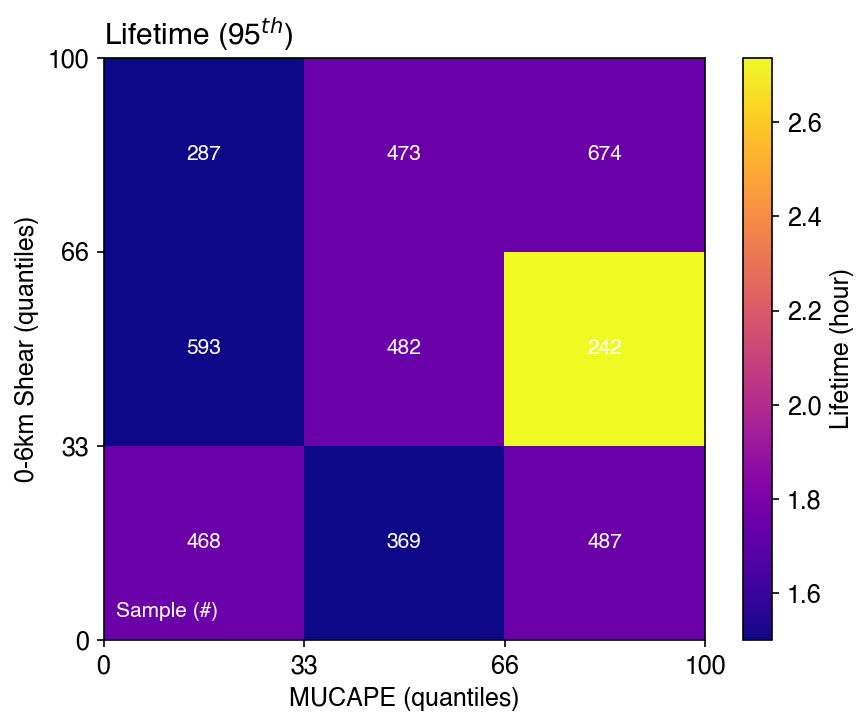

In [48]:
qntl = 0.95
# Find quantile bin index
idx = np.where(np.array(quantiles_2d) == qntl)[0].item()
data_arr = lifetime_capeshear6mag_pts[idx,:,:]
# data_arr = lifetime_capeshear6mag_avg
sample_arr = nsamples_capeshear6mag
ticklabels = (np.array(quantile_bins)*100).astype(int)
cblabel = 'Lifetime (hour)'
cmap = 'plasma'
xlabel = 'MUCAPE (quantiles)'
ylabel = '0-6km Shear (quantiles)'
title = f'Lifetime ({qntl*100:.0f}'+'$^{th}$)'
figname = f'{figdir}celllifetime_filledjointhist_MUCAPE_Shear0-6km.png'
fig = plot_filledjointhist(data_arr, sample_arr, qntl, ticklabels, xlabel, ylabel, title, cblabel, figname)

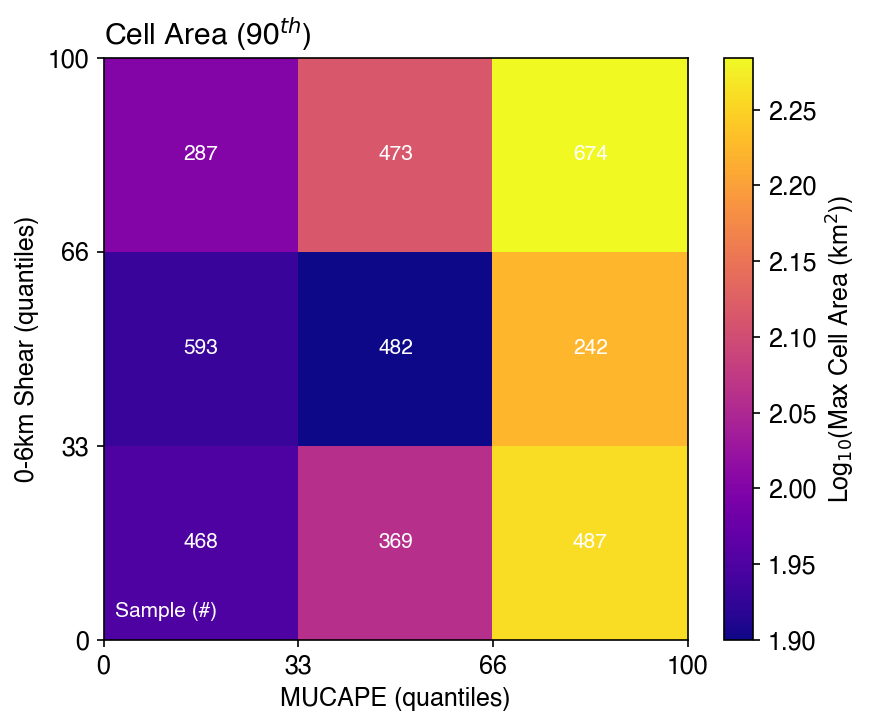

In [49]:
qntl = 0.9
# Find quantile bin index
idx = np.where(np.array(quantiles_2d) == qntl)[0].item()
data_arr = np.log10(cell_area_capeshear6mag_pts[idx,:,:])
# data_arr = cell_area_capeshear6mag_avg
sample_arr = nsamples_capeshear6mag
ticklabels = (np.array(quantile_bins)*100).astype(int)
cblabel = 'Log$_{10}$(Max Cell Area (km$^2$))'
cmap = 'plasma'
xlabel = 'MUCAPE (quantiles)'
ylabel = '0-6km Shear (quantiles)'
title = f'Cell Area ({qntl*100:.0f}'+'$^{th}$)'
figname = f'{figdir}cellarea_filledjointhist_MUCAPE_Shear0-6km.png'
fig = plot_filledjointhist(data_arr, sample_arr, qntl, ticklabels, xlabel, ylabel, title, cblabel, figname)

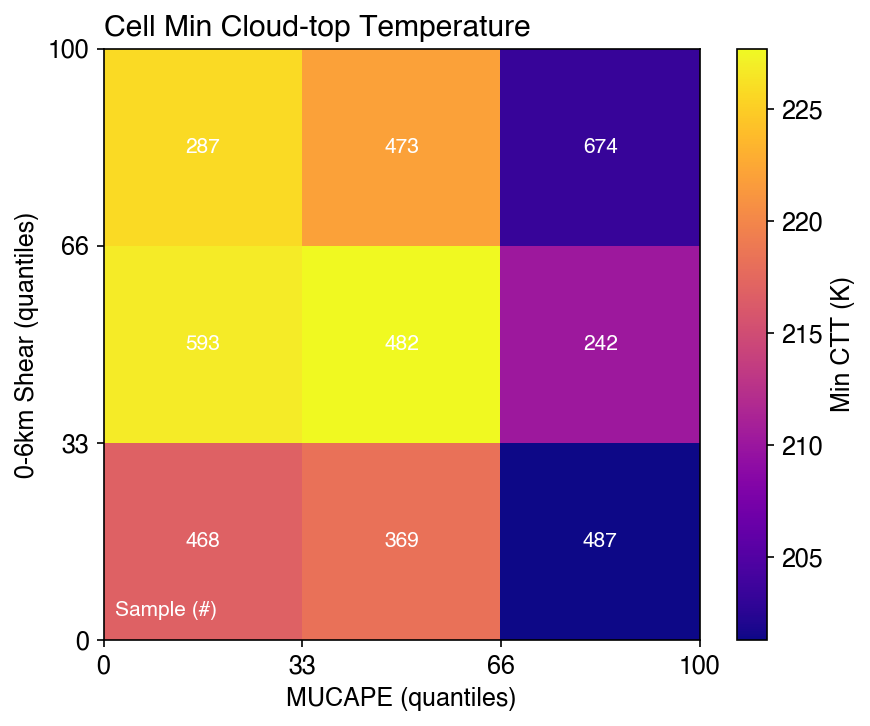

In [50]:
qntl = 0.25
# Find quantile bin index
idx = np.where(np.array(quantiles_2d) == qntl)[0].item()
data_arr = minctt_capeshear6mag_pts[idx,:,:]
# data_arr = minctt_capeshear6mag_avg
sample_arr = nsamples_capeshear6mag
ticklabels = (np.array(quantile_bins)*100).astype(int)
cblabel = 'Min CTT (K)'
cmap = 'plasma'
xlabel = 'MUCAPE (quantiles)'
ylabel = '0-6km Shear (quantiles)'
# title = f'Min CTT ({qntl*100:.0f}'+'$^{th}$)'
title = f'Cell Min Cloud-top Temperature'
figname = f'{figdir}CellMinCTT_filledjointhist_MUCAPE_Shear0-6km.png'
fig = plot_filledjointhist(data_arr, sample_arr, qntl, ticklabels, xlabel, ylabel, title, cblabel, figname)

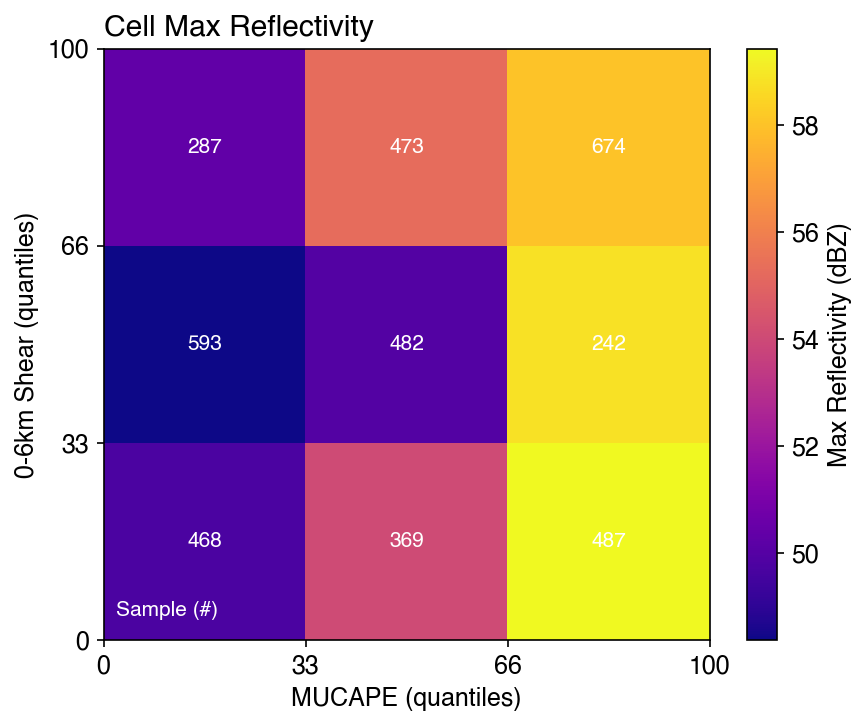

In [51]:
qntl = 0.9
# Find quantile bin index
idx = np.where(np.array(quantiles_2d) == qntl)[0].item()
data_arr = max_dbz_capeshear6mag_pts[idx,:,:]
# data_arr = minctt_capeshear6mag_avg
sample_arr = nsamples_capeshear6mag
ticklabels = (np.array(quantile_bins)*100).astype(int)
cblabel = 'Max Reflectivity (dBZ)'
cmap = 'plasma'
xlabel = 'MUCAPE (quantiles)'
ylabel = '0-6km Shear (quantiles)'
# title = f'Min CTT ({qntl*100:.0f}'+'$^{th}$)'
title = f'Cell Max Reflectivity'
figname = f'{figdir}CellMaxDBZ_filledjointhist_MUCAPE_Shear0-6km.png'
fig = plot_filledjointhist(data_arr, sample_arr, qntl, ticklabels, xlabel, ylabel, title, cblabel, figname)

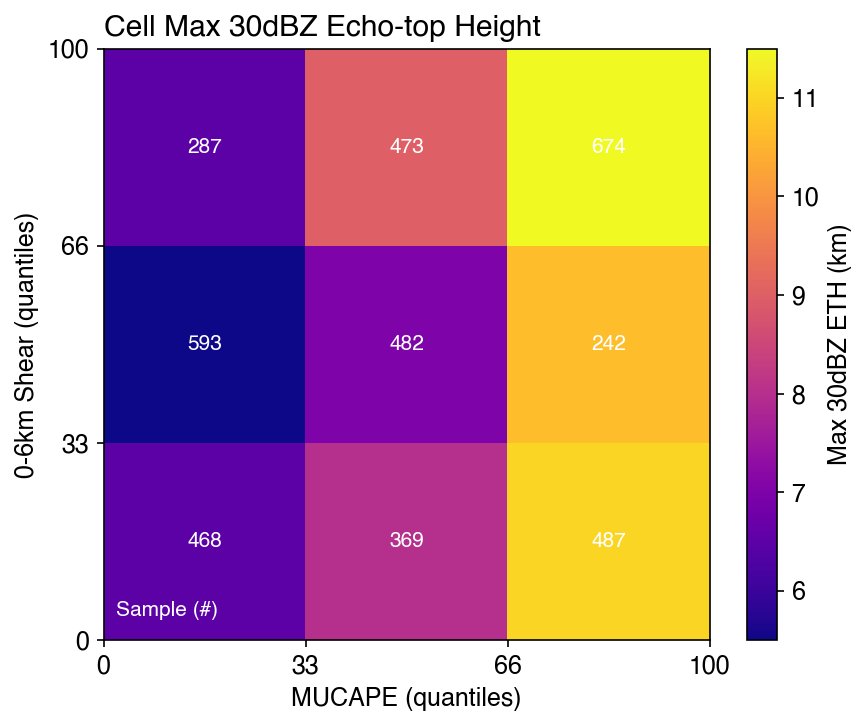

In [52]:
qntl = 0.9
# Find quantile bin index
idx = np.where(np.array(quantiles_2d) == qntl)[0].item()
data_arr = max_eth30_capeshear6mag_pts[idx,:,:]
sample_arr = nsamples_capeshear6mag
ticklabels = (np.array(quantile_bins)*100).astype(int)
cblabel = 'Max 30dBZ ETH (km)'
cmap = 'plasma'
xlabel = 'MUCAPE (quantiles)'
ylabel = '0-6km Shear (quantiles)'
# title = f'Min CTT ({qntl*100:.0f}'+'$^{th}$)'
title = f'Cell Max 30dBZ Echo-top Height'
figname = f'{figdir}CellMaxETH30dBZ_filledjointhist_MUCAPE_Shear0-6km.png'
fig = plot_filledjointhist(data_arr, sample_arr, qntl, ticklabels, xlabel, ylabel, title, cblabel, figname)

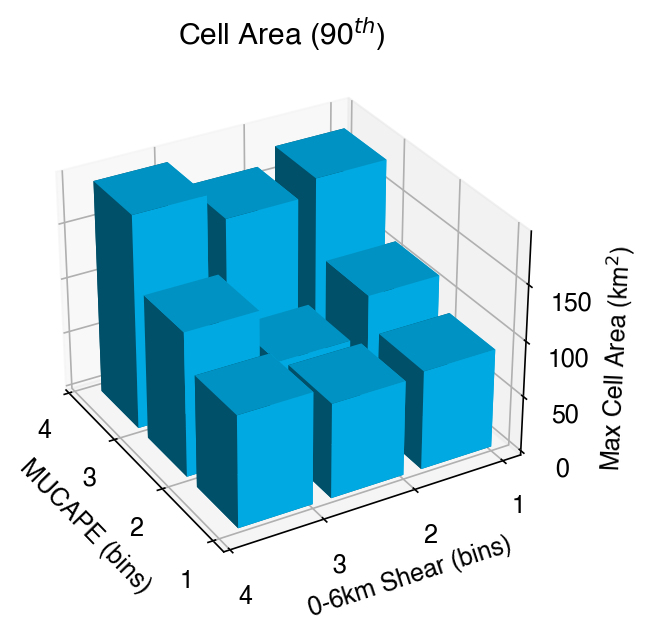

In [53]:
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'Helvetica'
mpl.rcParams['figure.facecolor'] = 'white'

fig = plt.figure(figsize=(10, 10), dpi=150)
ax1 = fig.add_subplot(121, projection='3d')

_x = np.arange(len(cape_bins)-1)+1
_y = np.arange(len(shear6mag_bins)-1)+1
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

# top = nsamples_capeshear6mag.ravel()
qntl = 0.9
# Find quantile bin index
idx = np.where(np.array(quantiles_2d) == qntl)[0].item()
top = cell_area_capeshear6mag_pts[idx,:,:].ravel()
# top = cell_area_capeshear6mag_avg.ravel()
bottom = np.zeros_like(top)
width = depth = 0.8

ax1.bar3d(x, y, bottom, width, depth, top, shade=True, color='deepskyblue')
ax1.view_init(30, 150)
# ax1.set_xlim3d(0,4)
# ax1.set_ylim3d(0,4)
ax1.set_xticks(np.arange(1,5))
ax1.set_yticks(np.arange(1,5))
# ax1.set_xticklabels(cape_range)
# ax1.set_yticklabels(shear6mag_range)
xlabel = 'MUCAPE (bins)'
ylabel = '0-6km Shear (bins)'
zlabel = 'Max Cell Area (km$^2$)'
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax1.set_zlabel(zlabel)
ax1.set_title(f'Cell Area ({qntl*100:.0f}'+'$^{th}$)')
fig.savefig(f'{figdir_jointhist}MaxArea_MUCAPE_Shear0-6km_3Dbar.png', bbox_inches='tight', dpi=300)

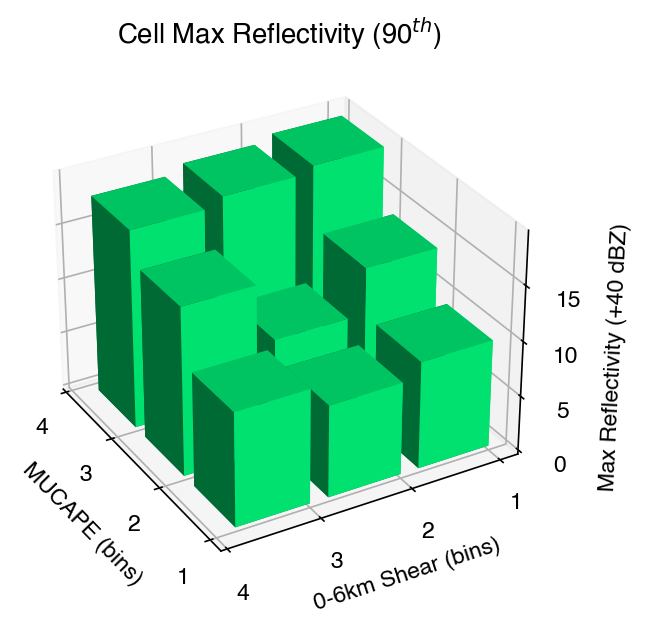

In [54]:
mpl.rcParams['font.size'] = 11
mpl.rcParams['font.family'] = 'Helvetica'
mpl.rcParams['figure.facecolor'] = 'white'

fig = plt.figure(figsize=(10, 10), dpi=150)
ax1 = fig.add_subplot(121, projection='3d')

_x = np.arange(len(cape_bins)-1)+1
_y = np.arange(len(shear6mag_bins)-1)+1
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

qntl = 0.9
# Find quantile bin index
idx = np.where(np.array(quantiles_2d) == qntl)[0].item()
top = max_dbz_capeshear6mag_pts[idx,:,:].ravel()
top = top - 40
bottom = np.zeros_like(top)
width = depth = 0.8

ax1.bar3d(x, y, bottom, width, depth, top, shade=True, color='springgreen')
ax1.view_init(30, 150)
# ax1.set_xlim3d(0,4)
# ax1.set_ylim3d(0,4)
ax1.set_xticks(np.arange(1,5))
ax1.set_yticks(np.arange(1,5))
# ax1.set_xticklabels(cape_range)
# ax1.set_yticklabels(shear6mag_range)
xlabel = 'MUCAPE (bins)'
ylabel = '0-6km Shear (bins)'
zlabel = 'Max Reflectivity (+40 dBZ)'
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax1.set_zlabel(zlabel)
ax1.set_title(f'Cell Max Reflectivity ({qntl*100:.0f}'+'$^{th}$)')
fig.savefig(f'{figdir_jointhist}MaxDBZ_MUCAPE_Shear0-6km_3Dbar.png', bbox_inches='tight', dpi=300)

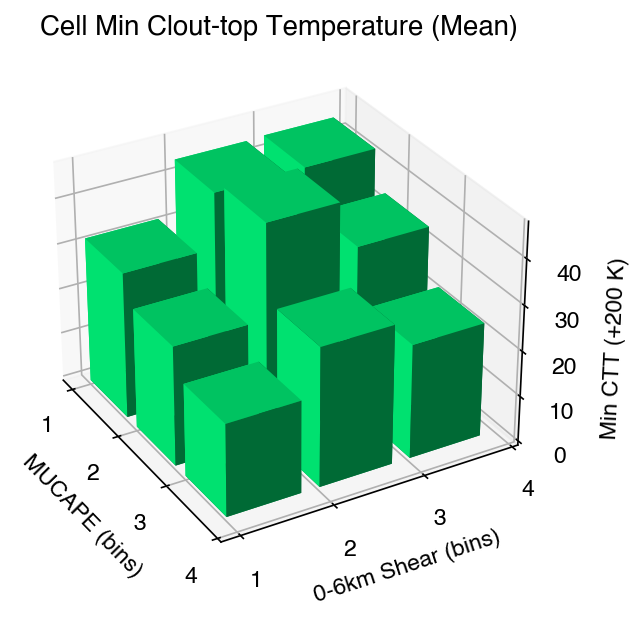

In [55]:
mpl.rcParams['font.size'] = 11
mpl.rcParams['font.family'] = 'Helvetica'
mpl.rcParams['figure.facecolor'] = 'white'

fig = plt.figure(figsize=(10, 10), dpi=150)
ax1 = fig.add_subplot(121, projection='3d')

_x = np.arange(len(cape_bins)-1)+1
_y = np.arange(len(shear6mag_bins)-1)+1
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

# top = nsamples_capeshear6mag.ravel()
qntl = 0.25
# Find quantile bin index
idx = np.where(np.array(quantiles_2d) == qntl)[0].item()
# top = minctt_capeshear6mag_pts[idx,:,:].ravel()
# top = top-180
top = minctt_capeshear6mag_avg.ravel()
top = top-200
# top = cell_area_capeshear6mag_avg.ravel()
bottom = np.zeros_like(top)
width = depth = 0.8

ax1.bar3d(x, y, bottom, width, depth, top, shade=True, color='springgreen')
ax1.view_init(30, -30)
# ax1.set_xlim3d(0,4)
# ax1.set_ylim3d(0,4)
ax1.set_xticks(np.arange(1,5))
ax1.set_yticks(np.arange(1,5))
# ax1.set_xticklabels(cape_range)
# ax1.set_yticklabels(shear6mag_range)
xlabel = 'MUCAPE (bins)'
ylabel = '0-6km Shear (bins)'
zlabel = 'Min CTT (+200 K)'
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax1.set_zlabel(zlabel)
# ax1.set_title(f'Cell Min Clout-top Temperature ({qntl*100:.0f}'+'$^{th}$)')
ax1.set_title(f'Cell Min Clout-top Temperature (Mean)')
fig.savefig(f'{figdir_jointhist}MinCTT_MUCAPE_Shear0-6km_3Dbar.png', bbox_inches='tight', dpi=300)

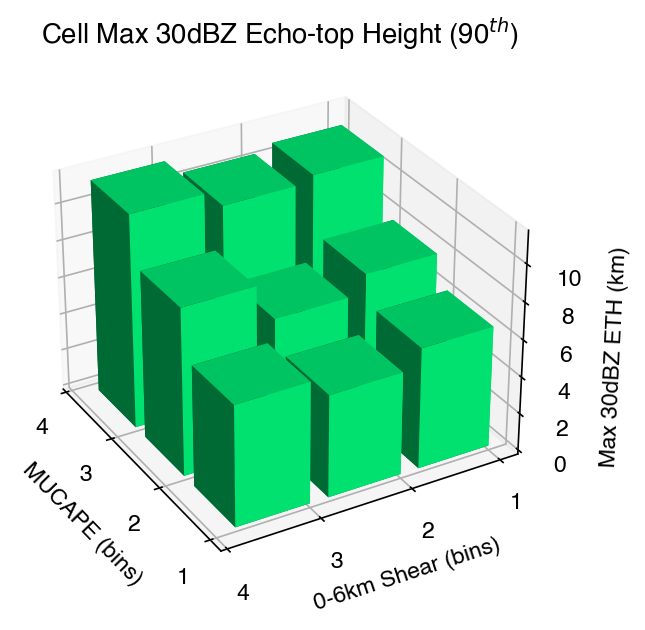

In [56]:
mpl.rcParams['font.size'] = 11
mpl.rcParams['font.family'] = 'Helvetica'
mpl.rcParams['figure.facecolor'] = 'white'

fig = plt.figure(figsize=(10, 10), dpi=150)
ax1 = fig.add_subplot(121, projection='3d')

_x = np.arange(len(cape_bins)-1)+1
_y = np.arange(len(shear6mag_bins)-1)+1
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

qntl = 0.9
# Find quantile bin index
idx = np.where(np.array(quantiles_2d) == qntl)[0].item()
top = max_eth30_capeshear6mag_pts[idx,:,:].ravel()
top = top
bottom = np.zeros_like(top)
width = depth = 0.8

ax1.bar3d(x, y, bottom, width, depth, top, shade=True, color='springgreen')
ax1.view_init(30, 150)
ax1.set_xticks(np.arange(1,5))
ax1.set_yticks(np.arange(1,5))
xlabel = 'MUCAPE (bins)'
ylabel = '0-6km Shear (bins)'
zlabel = 'Max 30dBZ ETH (km)'
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax1.set_zlabel(zlabel)
ax1.set_title(f'Cell Max 30dBZ Echo-top Height ({qntl*100:.0f}'+'$^{th}$)')
fig.savefig(f'{figdir_jointhist}MaxETH30dBZ_MUCAPE_Shear0-6km_3Dbar.png', bbox_inches='tight', dpi=300)

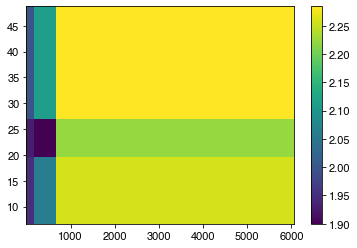

In [57]:
qntl = 0.9
idx = np.where(np.array(quantiles_2d) == qntl)[0]
plt.pcolormesh(cape_range, shear6mag_range, np.log10(cell_area_capeshear6mag_pts[idx,:,:]).squeeze())
plt.colorbar()

In [58]:
cape_range

array([2.08569132e-02, 1.78265306e+02, 6.86126221e+02, 6.06525781e+03])